In [1]:
import os
import numpy as np
import pandas as pd
import glob
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as scistats
import statistics as stats
import seaborn as sns
from pathlib import Path

## Libraries, Helper Functions and High Level Variables

In [2]:
matplotlib.rcParams.update({'font.size': 12})

dir_path = Path(os.getcwd())
data_dir = str(os.path.join(dir_path,'data_monte_carlo'))
balance_files = glob.glob(data_dir + "/poker_balances*.csv")
hands_files = glob.glob(data_dir + "/poker_hands*.csv")
table_files = glob.glob(data_dir + "/poker_table_info*.csv")

def get_hands_df():
    hands_dfs=[]

    for file in hands_files:
        new_df = pd.read_csv(file)
        hands_dfs.append(new_df)

    hands = pd.concat(hands_dfs)
    return hands
    
def get_games_df():
    balance_dfs=[]
    
    for file in balance_files:
        new_df = pd.read_csv(file)
        balance_dfs.append(new_df)
        
    balances = pd.concat(balance_dfs)
    return balances

def get_table_df():
    table_dfs=[]
    
    for file in table_files:
        new_df = pd.read_csv(file)
        table_dfs.append(new_df)
        
    tables = pd.concat(table_dfs)
    return tables


## Getting the Data and Augmentation

In [3]:
pd.set_option('display.max_columns', None)  
hands_base = get_hands_df()
games_base = get_games_df()
tables = get_table_df()

tables['category'] = np.where(tables['scenario_name'].str.startswith('smart'),'smart','mcts')

games = pd.merge(games_base,tables)
hands = pd.merge(hands_base,games)

In [4]:
tables.to_csv('tables.csv')
games.to_csv('games.csv')
hands.to_csv('hands.to_csv')

In [5]:
games.groupby('player_type').count()

table_id  game_id  player_name  game_result  \
player_type                                                               
AlwaysCallPlayer               90000    90000        90000        90000   
MonteCarloTreeSearchPlayer     15000    15000        15000        15000   
SmartPlayer                    15000    15000        15000        15000   

                            game_reason  blind_type  final_hand  \
player_type                                                       
AlwaysCallPlayer                  90000       90000       90000   
MonteCarloTreeSearchPlayer        15000       15000       15000   
SmartPlayer                       15000       15000       15000   

                            beginning_balance  game_start_balance  \
player_type                                                         
AlwaysCallPlayer                        90000               90000   
MonteCarloTreeSearchPlayer              15000               15000   
SmartPlayer                             15000               15000   

                            game_end_balance  game_net_change  scenario_name  \
player_type                                                                    
AlwaysCallPlayer                       90000            90000          90000   
MonteCarloTreeSearchPlayer             15000            15000          15000   
SmartPlayer                            15000            15000          15000   

                            player_types  category  
player_type                                         
AlwaysCallPlayer                   90000     90000  
MonteCarloTreeSearchPlayer         15000     15000  
SmartPlayer                        15000     15000

In [6]:
games[(games['game_result']=='won') & (games['player_type']=='MonteCarloTreeSearchPlayer')]

table_id   game_id player_name                 player_type  \
100            1   1000001   players_2  MonteCarloTreeSearchPlayer   
104            1   1000005   players_2  MonteCarloTreeSearchPlayer   
107            1   1000008   players_2  MonteCarloTreeSearchPlayer   
145            1   1000046   players_2  MonteCarloTreeSearchPlayer   
151            1   1000052   players_2  MonteCarloTreeSearchPlayer   
...          ...       ...         ...                         ...   
119495        98  98000096   players_5  MonteCarloTreeSearchPlayer   
119916        99  99000017   players_5  MonteCarloTreeSearchPlayer   
119952        99  99000053   players_5  MonteCarloTreeSearchPlayer   
119988        99  99000089   players_5  MonteCarloTreeSearchPlayer   
119992        99  99000093   players_5  MonteCarloTreeSearchPlayer   

       game_result game_reason blind_type  final_hand  beginning_balance  \
100            won    won_game        big       flush             100000   
104            won    won_game        big       flush             100000   
107            won    won_game      small    one_pair             100000   
145            won    won_game      small    two_pair             100000   
151            won    won_game      small    one_pair             100000   
...            ...         ...        ...         ...                ...   
119495         won    won_game        big    straight             100000   
119916         won    won_game       None  full_house             100000   
119952         won    won_game       None    two_pair             100000   
119988         won    won_game       None       flush             100000   
119992         won    won_game       None    one_pair             100000   

        game_start_balance  game_end_balance  game_net_change  \
100               100000.0          100000.0              0.0   
104                99980.0          103290.0           3310.0   
107               103270.0          103380.0            110.0   
145               102060.0          102170.0            110.0   
151               101930.0          102040.0            110.0   
...                    ...               ...              ...   
119495            107930.0          124370.0          16440.0   
119916             99405.0          123445.0          24040.0   
119952            122685.0          123125.0            440.0   
119988            118020.0          126460.0           8440.0   
119992            126445.0          126760.0            315.0   

                                     scenario_name  \
100     alwayscall vs 1 all different types player   
104     alwayscall vs 1 all different types player   
107     alwayscall vs 1 all different types player   
145     alwayscall vs 1 all different types player   
151     alwayscall vs 1 all different types player   
...                                            ...   
119495  alwayscall vs 4 all different types player   
119916  alwayscall vs 4 all different types player   
119952  alwayscall vs 4 all different types player   
119988  alwayscall vs 4 all different types player   
119992  alwayscall vs 4 all different types player   

                                             player_types category  
100           AlwaysCallPlayer|MonteCarloTreeSearchPlayer     mcts  
104           AlwaysCallPlayer|MonteCarloTreeSearchPlayer     mcts  
107           AlwaysCallPlayer|MonteCarloTreeSearchPlayer     mcts  
145           AlwaysCallPlayer|MonteCarloTreeSearchPlayer     mcts  
151           AlwaysCallPlayer|MonteCarloTreeSearchPlayer     mcts  
...                                                   ...      ...  
119495  AlwaysCallPlayer|AlwaysCallPlayer|AlwaysCallPl...     mcts  
119916  AlwaysCallPlayer|AlwaysCallPlayer|AlwaysCallPl...     mcts  
119952  AlwaysCallPlayer|AlwaysCallPlayer|AlwaysCallPl...     mcts  
119988  AlwaysCallPlayer|AlwaysCallPlayer|AlwaysCallPl...     mcts  
119992  AlwaysCallPlayer|AlwaysCallPlayer|AlwaysCallPl...     mct

## Data Samples

We have 3 individual tables: tables, games and hands.  They each represent different types of entities.  This will be explained per table.

### Table 

Our simulation software maps a scenario to a simulation, which in-turn runs a set of 2-6 players over 10 poker tables similar to simulation softwares concept of replications.  Each player within a scenario can have one of 3 personas: Smart Player, Conservative Player or Always Calls Player.  Smart Player runs a 100-card monte-carlo simulation everytime he has to make a betting decision, Conservative player ... and always calls player always calls no matter what happens.  Other types of player personas are implemented, but not used in this analysis.  We decided for this analysis to compare the smart player against the conservative player by having each player play 5 different scenarios against 1,2,3,4 and 5 always call type players. Than compare results between the two of them.  The Tables Dataframe below represents scenario and table level information eg simulation and replication info.

Fields:

* table_id -> replication id representing a poker table
* scenario_name -> represents the name of a simulation
* player_types -> a pipe delimited list of all player personas or types
* category -> if the table is part of the smart or conservative player analysis


In [7]:
tables.head(5)

table_id                               scenario_name  \
0         1  alwayscall vs 1 all different types player   
0        10  alwayscall vs 1 all different types player   
0       100  alwayscall vs 4 all different types player   
0       101  alwayscall vs 4 all different types player   
0       102  alwayscall vs 4 all different types player   

                                        player_types category  
0        AlwaysCallPlayer|MonteCarloTreeSearchPlayer     mcts  
0        AlwaysCallPlayer|MonteCarloTreeSearchPlayer     mcts  
0  AlwaysCallPlayer|AlwaysCallPlayer|AlwaysCallPl...     mcts  
0  AlwaysCallPlayer|AlwaysCallPlayer|AlwaysCallPl...     mcts  
0  AlwaysCallPlayer|AlwaysCallPlayer|AlwaysCallPl...     mcts

### Games

Each table is assigned a French-style poker deck of 52 cards, which it uses to play 100 sequential games of poker with.  It reshuffles the deck after each game.  The balances of the player are carried over between games.  The Games table contains the results of the games and the changes of each players balance as the 100 games progress.  It also records the overall outcome of the player within the game: won/lost and what the final hand would have been (straight, 2-pair, 3-pair etc).  The following information is contained in the Games Data Frame.

Fields:
* table_id -> a relational link to tables data frame representing the table or replication the row is associated with
* game_id -> an id representing one of 100 sequential games for a given table ordered chronologically.
* player_name -> name of the player usually player 1,2,3,4,5,6
* player_type -> the player personal or strategy used during the match
* game_result -> if the player won or lost the round
* game_reason -> did the player win or lose the match during the final hand or did he fold or alternatively was the only person that didn't fodl.
* blind type -> was the player the small or large blind
* beginning balance -> the players balance before joining the table.
* game_start_balance -> the player balance during the start of the poker game
* game_end_balance -> the player balance after the end of the poker game
* game_net_change -> the net change in players balance after the conclusion of the game
* scenario_name -> what scenario it belongs too
* player_types -> what player personas were involved in the game
* category -> what category smart or conservative player analysis dis this game belong to.


In [8]:
games.head(5)

table_id  game_id player_name       player_type game_result  \
0         1  1000001   players_1  AlwaysCallPlayer         won   
1         1  1000002   players_1  AlwaysCallPlayer         won   
2         1  1000003   players_1  AlwaysCallPlayer         won   
3         1  1000004   players_1  AlwaysCallPlayer         won   
4         1  1000005   players_1  AlwaysCallPlayer        lost   

         game_reason blind_type final_hand  beginning_balance  \
0           won_game      small      flush             100000   
1  last_man_standing        big   one_pair             100000   
2           won_game      small   two_pair             100000   
3  last_man_standing        big   straight             100000   
4          lost_game      small   one_pair             100000   

   game_start_balance  game_end_balance  game_net_change  \
0            100000.0          100000.0              0.0   
1            100000.0          100005.0              5.0   
2            100005.0          100015.0             10.0   
3            100015.0          100020.0              5.0   
4            100020.0           96710.0          -3310.0   

                                scenario_name  \
0  alwayscall vs 1 all different types player   
1  alwayscall vs 1 all different types player   
2  alwayscall vs 1 all different types player   
3  alwayscall vs 1 all different types player   
4  alwayscall vs 1 all different types player   

                                  player_types category  
0  AlwaysCallPlayer|MonteCarloTreeSearchPlayer     mcts  
1  AlwaysCallPlayer|MonteCarloTreeSearchPlayer     mcts  
2  AlwaysCallPlayer|MonteCarloTreeSearchPlayer     mcts  
3  AlwaysCallPlayer|MonteCarloTreeSearchPlayer     mcts  
4  AlwaysCallPlayer|MonteCarloTreeSearchPlayer     mcts

### Hands

Each Game of poker is actually a set of up to 12 betting decisions per player.  3 for pre-flob, 3-card community, 4-card community and 5 card community post-flops.  A player can: call/check, raise or fold the hand.  Each row in the hands dataframe represents one of these betting decisions and provides all the information a player had when making the bet.  It also shows you the result of the bet.  Useful for stepping through the players action during a game.

Fields:
* table_id -> table associated with the bet
* game_id -> game associated with the bet
* player_name -> player name associated with the bet
* player_type -> player persona or strategy used during the bet
* bet_number -> for this specific game_id what bet number this is (1st bet, 2nd bet etc)
* opponents -> number of opponents left
* call -> how much the player needs to call to stay in the game
* current -> how much the player has in the pot right now
* pot -> how large the pot or reward is
* allowed -> if the player was allowed to raise or if it was the last round of bets
* hand1 -> first card in the players hand (of 2)
* hand2 -> the second card in the players hand (of 2)
* community1-5 -> 1-5 community card in the post flop

Everything after these fields are created from a joing to both table and game for convenice.

In [9]:
hands.head(5)

table_id  game_id player_name       player_type  bet_number  opponents  \
0         1  1000001   players_1  AlwaysCallPlayer           1          1   
1         1  1000001   players_1  AlwaysCallPlayer           2          1   
2         1  1000001   players_1  AlwaysCallPlayer           3          1   
3         1  1000001   players_1  AlwaysCallPlayer           4          1   
4         1  1000001   players_1  AlwaysCallPlayer           5          1   

   call  current   final   pot  allowed       hand1     hand2 community1  \
0     5        5    10.0    15     True  5-diamonds  6-hearts      Z-N/A   
1     0       10    10.0    20     True  5-diamonds  6-hearts   3-hearts   
2  1000       10  1010.0  1020     True  5-diamonds  6-hearts   3-hearts   
3  1000     1010  2010.0  3020    False  5-diamonds  6-hearts   3-hearts   
4     0     2010  2010.0  4020     True  5-diamonds  6-hearts   2-spades   

  community2 community3 community4 community5 game_result game_reason  \
0      Z-N/A      Z-N/A      Z-N/A      Z-N/A         won    won_game   
1  10-hearts   A-hearts      Z-N/A      Z-N/A         won    won_game   
2  10-hearts   A-hearts      Z-N/A      Z-N/A         won    won_game   
3  10-hearts   A-hearts      Z-N/A      Z-N/A         won    won_game   
4   3-hearts  10-hearts   A-hearts      Z-N/A         won    won_game   

  blind_type final_hand  beginning_balance  game_start_balance  \
0      small      flush             100000            100000.0   
1      small      flush             100000            100000.0   
2      small      flush             100000            100000.0   
3      small      flush             100000            100000.0   
4      small      flush             100000            100000.0   

   game_end_balance  game_net_change  \
0          100000.0              0.0   
1          100000.0              0.0   
2          100000.0              0.0   
3          100000.0              0.0   
4          100000.0              0.0   

                                scenario_name  \
0  alwayscall vs 1 all different types player   
1  alwayscall vs 1 all different types player   
2  alwayscall vs 1 all different types player   
3  alwayscall vs 1 all different types player   
4  alwayscall vs 1 all different types player   

                                  player_types category  
0  AlwaysCallPlayer|MonteCarloTreeSearchPlayer     mcts  
1  AlwaysCallPlayer|MonteCarloTreeSearchPlayer     mcts  
2  AlwaysCallPlayer|MonteCarloTreeSearchPlayer     mcts  
3  AlwaysCallPlayer|MonteCarloTreeSearchPlayer     mcts  
4  AlwaysCallPlayer|MonteCarloTreeSearchPlayer     mcts

# High Level Statistics - All Simulations

We provide a high-level aggregation across all simulations to provide context into the simulation software as a whole.  Since the simulation software is highly configurable, these high level statistics are useful for gauging things like performance or to catch anomalies.

In [10]:
player_final_hands = hands.query('community5 != "Z-N/A"').groupby(['table_id','game_id','player_name','hand1','hand2','community1','community2','community3','community4','community5','final_hand']).count().game_result.reset_index().groupby('final_hand').game_id.count().reset_index()
player_final_hands_type, player_final_hands_type_numbers = list(zip(*player_final_hands.values))
player_final_hands_type = ['player final _hand' + card for card in player_final_hands_type]

winning_hands = games.query('game_result == "won"').groupby(['game_id','final_hand']).count().groupby('final_hand').count().reset_index()[['final_hand','table_id']]
winning_hand_type, winning_hand_type_numbers = list(zip(*winning_hands.values))
winning_hand_type = ['won by ' + card for card in winning_hand_type]

simulation_overview = pd.DataFrame(
    data={
            "Metric":[
                "scenarios",
                "player strategies",
                "active players",
                "player - bet decisions",
                "tables",
                "games", 
                "average chip gain/loss",
                "average pot size",
                "unique 2-card combos",
                "unique end combos",
                "unique 3-card flops",
                "unique 4-card flops",
                "unique 5-card flops"
            ] + list(player_final_hands_type) +
                list(winning_hand_type),
            "Total":[
                tables.scenario_name.nunique(),
                games.player_type.nunique(),
                games.groupby(['table_id','player_name']).game_result.count().reset_index().shape[0],
                hands.shape[0],
                tables.table_id.nunique(),
                games.groupby(['table_id', 'game_id']).ngroups,
                round(games.game_net_change.mean(),0),
                round(hands.pot.mean(),0),
                hands.groupby(['hand1','hand2']).count().reset_index().shape[0],
                hands.query('community5 != "Z-N/A"').groupby(['hand1','hand2','community1','community2','community3','community4','community5']).count().reset_index().shape[0],
                hands.query('community1 != "Z-N/A"').groupby(['community1','community2','community3']).count().reset_index().shape[0],
                hands.query('community4 != "Z-N/A"').groupby(['community1','community2','community3','community4']).count().reset_index().shape[0],
                hands.query('community5 != "Z-N/A"').groupby(['community1','community2','community3','community4','community5']).count().reset_index().shape[0]
            ] + list(player_final_hands_type_numbers) +
                list(winning_hand_type_numbers)
    },
    columns = ['Metric','Total']
)

simulation_overview

Metric     Total
0                          scenarios      10.0
1                  player strategies       3.0
2                     active players    1200.0
3             player - bet decisions  686428.0
4                             tables     300.0
5                              games   30000.0
6             average chip gain/loss      -0.0
7                   average pot size     414.0
8               unique 2-card combos    1404.0
9                  unique end combos   95040.0
10               unique 3-card flops   21992.0
11               unique 4-card flops   43879.0
12               unique 5-card flops   26330.0
13            player final _handNone    1916.0
14           player final _handflush    3043.0
15    player final _handfour_of_kind     186.0
16      player final _handfull_house    2716.0
17       player final _handhigh_card   15228.0
18        player final _handone_pair   39768.0
19        player final _handstraight    4590.0
20  player final _handstraight_flush      39.0
21   player final _handthree_of_kind    4728.0
22        player final _handtwo_pair   22826.0
23                      won by flush    2303.0
24               won by four_of_kind     176.0
25                 won by full_house    2235.0
26                  won by high_card    1104.0
27                   won by one_pair    8355.0
28                   won by straight    3406.0
29             won by straight_flush      39.0
30              won by three_of_kind    2981.0
31                   won by two_pair    9401.0

# Performance over all Games by Player Type

Below we provide a reference for all replications (tables) within each scenario by averaging the mean net change in each persons chips over all games as well as variance and standard deviation.  We also report the players, lowest and highest balances.

In [11]:
table_level_statistics = games.groupby(['category','scenario_name','table_id','player_name','player_type']).agg({
    "game_net_change":[np.mean,lambda col: np.var(col,ddof=1),'count'],
    "game_end_balance":[np.min,np.max]
}).reset_index().sort_values(['table_id','player_name'])

table_level_statistics.columns = ['category','scenario_name','table_id','player_name','player_type','table_mean','table_variance','count','player_lowest_balance','player_highest_balance']
table_level_statistics['confidence_interval'] = table_level_statistics.apply(lambda df: scistats.t.interval(alpha=.99,df=df['count'],loc=df['table_mean'],scale=np.sqrt(df['table_variance'])/np.sqrt(df['count'])),axis=1)
table_level_statistics['lower_bound_95%'], table_level_statistics['upper_bound_95%'] = zip(*table_level_statistics.confidence_interval)
table_level_statistics.pop('confidence_interval')
table_level_statistics



category                               scenario_name  table_id  \
0        mcts  alwayscall vs 1 all different types player         1   
1        mcts  alwayscall vs 1 all different types player         1   
2        mcts  alwayscall vs 1 all different types player         2   
3        mcts  alwayscall vs 1 all different types player         2   
4        mcts  alwayscall vs 1 all different types player         3   
...       ...                                         ...       ...   
1195    smart       smart vs 5 all different types player       300   
1196    smart       smart vs 5 all different types player       300   
1197    smart       smart vs 5 all different types player       300   
1198    smart       smart vs 5 all different types player       300   
1199    smart       smart vs 5 all different types player       300   

     player_name                 player_type  table_mean  table_variance  \
0      players_1            AlwaysCallPlayer      -66.20   461465.717172   
1      players_2  MonteCarloTreeSearchPlayer       66.20   461465.717172   
2      players_1            AlwaysCallPlayer      -20.25   256632.007576   
3      players_2  MonteCarloTreeSearchPlayer       20.25   256632.007576   
4      players_1            AlwaysCallPlayer      -79.35   847775.078283   
...          ...                         ...         ...             ...   
1195   players_2            AlwaysCallPlayer      -14.78   166028.274343   
1196   players_3            AlwaysCallPlayer      -11.78   212290.577374   
1197   players_4            AlwaysCallPlayer      -51.18   227287.926869   
1198   players_5            AlwaysCallPlayer       14.72   389190.668283   
1199   players_6                 SmartPlayer       61.40   441715.191919   

      count  player_lowest_balance  player_highest_balance  lower_bound_95%  \
0       100                91155.0                100020.0      -244.580073   
1       100                99980.0                108845.0      -112.180073   
2       100                97285.0                101595.0      -153.274620   
3       100                98405.0                102715.0      -112.774620   
4       100                92030.0                102820.0      -321.128088   
...     ...                    ...                     ...              ...   
1195    100                96262.0                100990.0      -121.776025   
1196    100                97180.0                100280.0      -132.767910   
1197    100                92512.0                100290.0      -176.368605   
1198    100                98090.0                105342.0      -149.096569   
1199    100                98460.0                106780.0      -113.121036   

      upper_bound_95%  
0          112.180073  
1          244.580073  
2          112.774620  
3          153.274620  
4          162.428088  
...               ...  
1195        92.216025  
1196       109.207910  
1197        74.008605  
1198       178.536569  
1199       235.921036  

[1200 rows x 12 columns]

Below graph, we look at all 10 of our scenarios by player.  The top 10 graphs represent our conservative scenarios in descending order of number of players.  The bottom 10 scenarios show Smart Player in descending number of opponents.  You can see that Smart Player shifts right as more players are added, while his opponents tend to lose about the same amount of chips per table.  This is due to the fact that the always call opponents make the same type of decisions and lose about the same percent of the time, but the smart player gets to reap the benefits of those calls by on average winning a larger parts due to more contributors.

Text(0.05, 0.5, 'Number of Games')

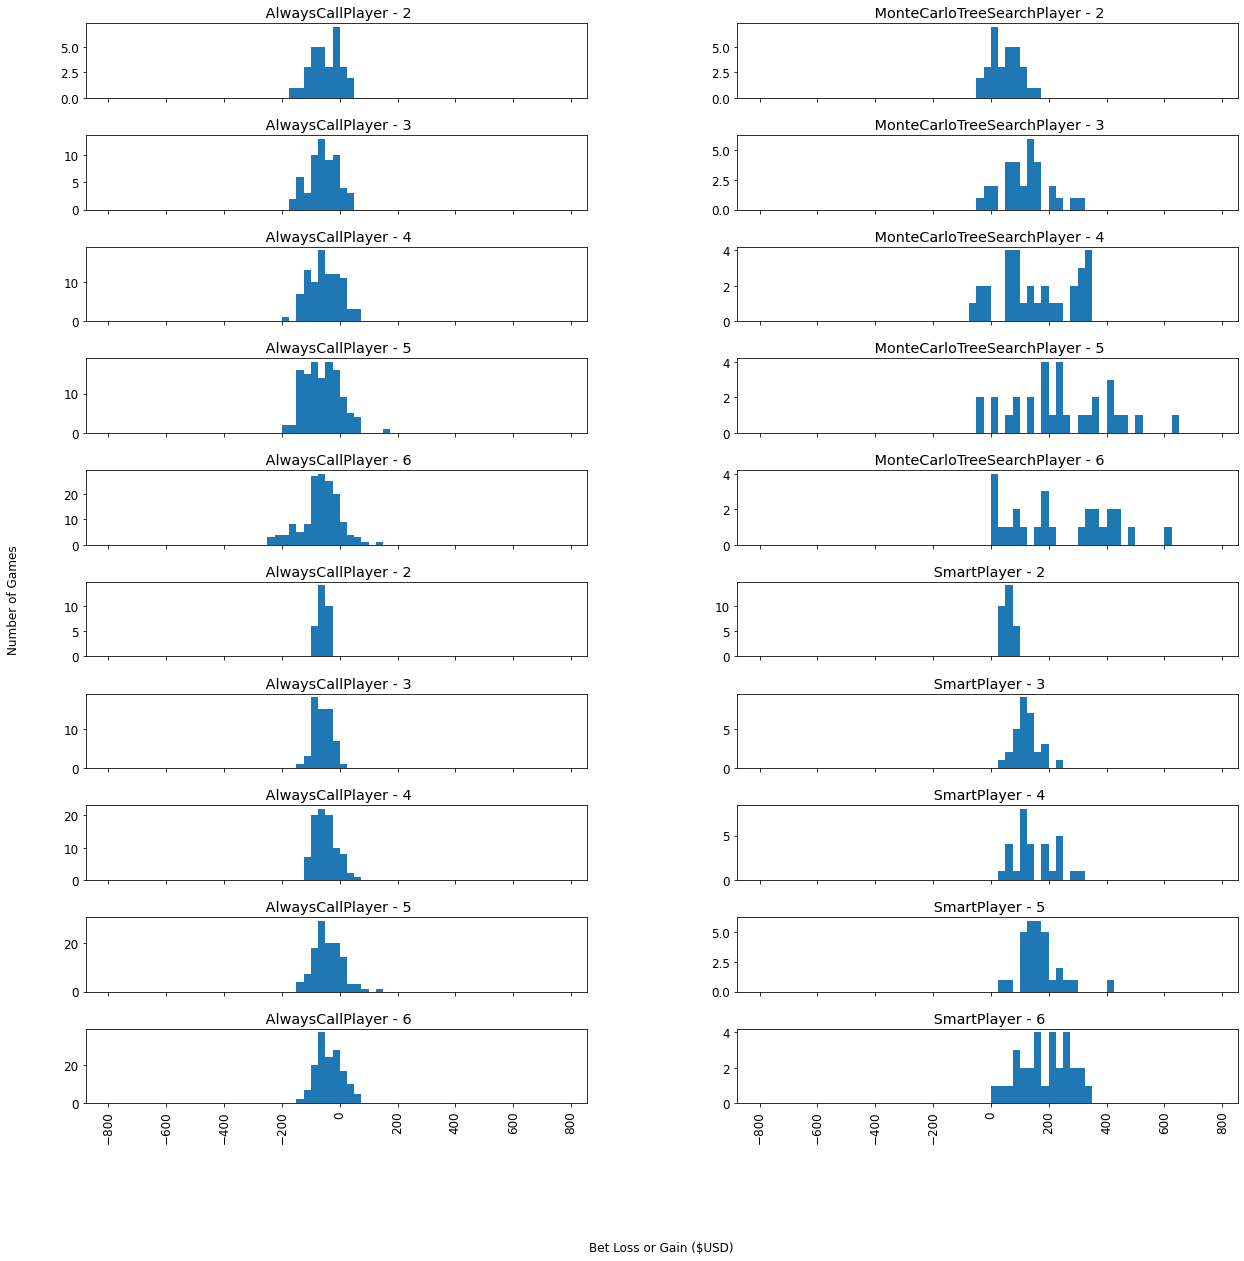

In [12]:
fig, axis = plt.subplots(10,2,figsize=(20, 20), sharex = True)

table_level_statistics.hist(
        column='table_mean',
        by=['scenario_name','player_type'],
        grid = True,
        bins = list(range(-800,800,25)),
        ax = axis
)

for row in axis:
    for col in row:
        player_name = col.title.get_text().split(',')[1]
        players_involved = int(''.join(i for i in col.title.get_text().split(',')[0] if i.isdigit())) + 1
        graph_title = player_name[:-1] + ' - ' + str(players_involved)
        col.set_title(graph_title)

fig.text(0.5,0.05, "Bet Loss or Gain ($USD)", ha="center", va="center")
fig.text(0.05,0.5, "Number of Games", ha="center", va="center", rotation=90)


We can also look at the mean, variance and standard deviation of players across all games within a scenario.  Sometimes interesting patterns emerge.

In [13]:
pd.options.display.float_format = '{:.5f}'.format

game_level_statistics = games.groupby(['category','scenario_name','player_name','player_type']).agg({
    "game_net_change":[np.mean,lambda col: np.var(col,ddof=1)],
    "game_end_balance":[np.min,np.max]
}).reset_index().sort_values(['player_name'])

game_level_statistics.columns = ['category','scenario_name','player_name','player_type','game_mean','game_variance','min_balance','max_balance']

game_level_statistics.sort_values(['player_type','scenario_name'],ascending=False)

category                               scenario_name player_name  \
39    smart       smart vs 5 all different types player   players_6   
33    smart       smart vs 4 all different types player   players_5   
28    smart       smart vs 3 all different types player   players_4   
24    smart       smart vs 2 all different types player   players_3   
21    smart       smart vs 1 all different types player   players_2   
19     mcts  alwayscall vs 5 all different types player   players_6   
13     mcts  alwayscall vs 4 all different types player   players_5   
8      mcts  alwayscall vs 3 all different types player   players_4   
4      mcts  alwayscall vs 2 all different types player   players_3   
1      mcts  alwayscall vs 1 all different types player   players_2   
34    smart       smart vs 5 all different types player   players_1   
35    smart       smart vs 5 all different types player   players_2   
36    smart       smart vs 5 all different types player   players_3   
37    smart       smart vs 5 all different types player   players_4   
38    smart       smart vs 5 all different types player   players_5   
29    smart       smart vs 4 all different types player   players_1   
30    smart       smart vs 4 all different types player   players_2   
31    smart       smart vs 4 all different types player   players_3   
32    smart       smart vs 4 all different types player   players_4   
25    smart       smart vs 3 all different types player   players_1   
26    smart       smart vs 3 all different types player   players_2   
27    smart       smart vs 3 all different types player   players_3   
22    smart       smart vs 2 all different types player   players_1   
23    smart       smart vs 2 all different types player   players_2   
20    smart       smart vs 1 all different types player   players_1   
14     mcts  alwayscall vs 5 all different types player   players_1   
15     mcts  alwayscall vs 5 all different types player   players_2   
16     mcts  alwayscall vs 5 all different types player   players_3   
17     mcts  alwayscall vs 5 all different types player   players_4   
18     mcts  alwayscall vs 5 all different types player   players_5   
9      mcts  alwayscall vs 4 all different types player   players_1   
10     mcts  alwayscall vs 4 all different types player   players_2   
11     mcts  alwayscall vs 4 all different types player   players_3   
12     mcts  alwayscall vs 4 all different types player   players_4   
5      mcts  alwayscall vs 3 all different types player   players_1   
6      mcts  alwayscall vs 3 all different types player   players_2   
7      mcts  alwayscall vs 3 all different types player   players_3   
2      mcts  alwayscall vs 2 all different types player   players_1   
3      mcts  alwayscall vs 2 all different types player   players_2   
0      mcts  alwayscall vs 1 all different types player   players_1   

                   player_type  game_mean  game_variance  min_balance  \
39                 SmartPlayer  186.28333   803160.08975  95535.00000   
33                 SmartPlayer  169.24417   598813.87570  96805.00000   
28                 SmartPlayer  152.67167   374042.51804  97203.33333   
24                 SmartPlayer  122.68000   187264.18900  97630.00000   
21                 SmartPlayer   61.15000    43573.76876  98750.00000   
19  MonteCarloTreeSearchPlayer  329.17000  5797150.69466  95250.00000   
13  MonteCarloTreeSearchPlayer  243.01306  3205607.43161  95085.00000   
8   MonteCarloTreeSearchPlayer  158.52000  1787166.28169  94800.00000   
4   MonteCarloTreeSearchPlayer  117.91500   976806.61331  95880.00000   
1   MonteCarloTreeSearchPlayer   49.54667   309179.60436  94375.00000   
34            AlwaysCallPlayer  -37.41933   243660.79176  86922.00000   
35            AlwaysCallPlayer  -44.57433   227497.49764  87604.00000   
36            AlwaysCallPlayer  -38.89100   232699.89308  86942.00000   
37            AlwaysCallPlayer  -31.70100   256224.17432  87780.00000

The overall game end balance is sequential, so it's a bit misleading to graph it as a box plot since each observation is not independent.  That said, the patterns in the distributions of end balances do have interesting properties in terms of ranges, mean and quartile that create an interesting observation.  Smart player's average is higher than 75% quantile of the All Call Players with the bottom of his range being about as bad as the mean of the all call players.  Smart playres end balance has significant amount of outliers sometimes 30% or more from the starting balanace.  The end balance for all call player tends to be lower, but not so drastic as the smart player.  partially due to the fact that in multiplayer games, Smart player can collect from many Always call players mitigating the damage.

[Text(1, 0, 'always call player - mcts scenario'),
 Text(2, 0, 'always call player - smart scenario'),
 Text(3, 0, 'montecarlo search player - mcts scenario'),
 Text(4, 0, 'smart player - smart scenario')]

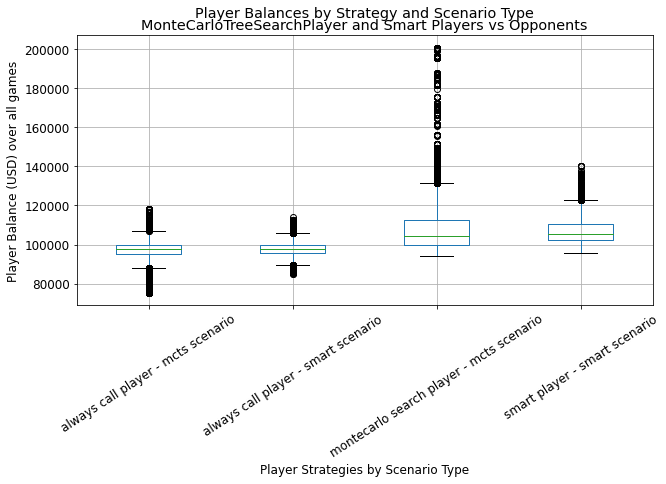

In [14]:
axis = games.boxplot(
        column=['game_end_balance'],
        by=['player_type','category'],
        figsize=(10,5),
        rot=33
)

plt.suptitle("Player Balances by Strategy and Scenario Type")
axis.set_title('MonteCarloTreeSearchPlayer and Smart Players vs Opponents')
axis.set_ylabel('Player Balance (USD) over all games')
axis.set_xlabel('Player Strategies by Scenario Type')

axis_replace={
    'AlwaysCallPlayer': 'always call player',
    'SmartPlayer': 'smart player',
    'MonteCarloTreeSearchPlayer': 'montecarlo search player'
}

axis_cat_labels = [ax.get_text()[1:-1].split(',') for ax in axis.get_xmajorticklabels()]
axis_cat_labels = [axis_replace[ax[0]] + ' -' + ax[1] + ' scenario' for ax in axis_cat_labels]
axis.set_xticklabels(axis_cat_labels)


# Performance of Player Balances over Time

We provide the time series we used for the player balance over 100 games.  We included all 10 scenarios here.  The game_id is mapped sequentially from 1-100.  Table id is uniquely mapped as well.  On average, the player balance for smart player increases dramatically at the expense of all call players.

In [15]:
time_series = games[['category','scenario_name','player_name','player_type','table_id','game_id','game_end_balance']]
time_series['game_id'] = (time_series['game_id'] - 1) % 100
time_series['table_id'] = (time_series['table_id'] - 1) % 10
time_series = time_series.pivot_table(index=['category','scenario_name','player_name','player_type','table_id'],columns=['game_id'],values='game_end_balance').reset_index()
time_series

<ipython-input-15-f58f2c9a0348>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series['game_id'] = (time_series['game_id'] - 1) % 100
<ipython-input-15-f58f2c9a0348>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series['table_id'] = (time_series['table_id'] - 1) % 10


game_id category                               scenario_name player_name  \
0           mcts  alwayscall vs 1 all different types player   players_1   
1           mcts  alwayscall vs 1 all different types player   players_1   
2           mcts  alwayscall vs 1 all different types player   players_1   
3           mcts  alwayscall vs 1 all different types player   players_1   
4           mcts  alwayscall vs 1 all different types player   players_1   
..           ...                                         ...         ...   
395        smart       smart vs 5 all different types player   players_6   
396        smart       smart vs 5 all different types player   players_6   
397        smart       smart vs 5 all different types player   players_6   
398        smart       smart vs 5 all different types player   players_6   
399        smart       smart vs 5 all different types player   players_6   

game_id       player_type  table_id            0            1            2  \
0        AlwaysCallPlayer         0 100106.66667 100113.33333 100123.33333   
1        AlwaysCallPlayer         1  99370.00000  99375.00000 101085.00000   
2        AlwaysCallPlayer         2 100210.00000 100250.00000 100186.66667   
3        AlwaysCallPlayer         3 100276.66667  99543.33333  99586.66667   
4        AlwaysCallPlayer         4  99330.00000  99405.00000  99415.00000   
..                    ...       ...          ...          ...          ...   
395           SmartPlayer         5 101010.00000 100966.66667 101476.66667   
396           SmartPlayer         6  99923.33333  99913.33333  99803.33333   
397           SmartPlayer         7  99923.33333  99880.00000 100856.66667   
398           SmartPlayer         8 101010.00000 100966.66667 100590.00000   
399           SmartPlayer         9  99990.00000  99946.66667 100890.00000   

game_id            3            4            5            6            7  \
0       100265.00000  99168.33333  99175.00000  99251.66667  99180.00000   
1       101090.00000 101166.66667 101175.00000 101185.00000 101261.66667   
2       100186.66667 100196.66667 100271.66667 100381.66667 100525.00000   
3        99661.66667  99738.33333  99776.66667  99313.33333  99386.66667   
4        99455.00000  99461.66667  99428.33333  99438.33333  99338.33333   
..               ...          ...          ...          ...          ...   
395     101233.33333 101090.00000 100881.66667 101458.33333 102401.66667   
396      99793.33333 100836.66667 100760.00000 101603.33333 101426.66667   
397     100846.66667 100836.66667 100793.33333 100716.66667 102580.00000   
398     101200.00000 102896.66667 102853.33333 102843.33333 102600.00000   
399     101900.00000 101890.00000 101780.00000 101436.66667 101193.33333   

game_id            8            9           10           11           12  \
0        97816.66667  97753.33333  97690.00000  97695.00000  97705.00000   
1       101305.00000 101413.33333 101456.66667 101351.66667 101361.66667   
2       100535.00000 100135.00000 100145.00000 100111.66667 100255.00000   
3        99463.33333  99538.33333  99108.33333  98743.33333  98613.33333   
4        99348.33333  99316.66667  99460.00000  99361.66667  99371.66667   
..               ...          ...          ...          ...          ...   
395     102058.33333 103068.33333 102991.66667 103668.33333 103358.33333   
396     102336.66667 102226.66667 102150.00000 102523.33333 103200.00000   
397     102370.00000 103380.00000 103370.00000 103326.66667 103316.66667   
398     102590.00000 102580.00000 102403.33333 102393.33333 103570.00000   
399     101183.33333 100973.33333 100963.33333 101231.66667 101188.33333   

game_id           13           14           15           16           17  \
0        97813.33333  97823.33333  97828.33333  97871.66667  97876.66667   
1       101401.66667 101005.00000 101008.33333 101018.33333 101026.66667   
2       100260.00000  98863.33333  98903.33333  98980.00000  98985.00000   
3        98756.66667

Below we provide per game confidence intervals for each player in each scenario category: conservative vs smart player.  Here you can look into the data about how poker players did relatively to the number of games played.

In [16]:
time_series = games[['category','player_type','game_id','game_end_balance']]
time_series['game_id'] = (time_series['game_id'] - 1) % 100
time_series_stats = time_series.groupby(['category','player_type','game_id']).agg(
    {'game_end_balance':[
        ['mean',np.mean],
        ['sample_var',lambda col: np.var(col,ddof=1)],
        ['N','count']]
    }
).reset_index()

time_series_stats.columns = ['category','player_type','game_id','mean','sample_var','N']
time_series_stats['confidence_interval'] = time_series_stats.apply(lambda df: scistats.norm.interval(alpha=.95, loc=df['mean'],scale=np.sqrt(df['sample_var'])/np.sqrt(df['N'])),axis=1)
time_series_stats['lower_bound_95%'], time_series_stats['upper_bound_95%'] = zip(*time_series_stats.confidence_interval)
time_series_stats.pop('confidence_interval')
time_series_stats

<ipython-input-16-786f9f52b911>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series['game_id'] = (time_series['game_id'] - 1) % 100


category       player_type  game_id         mean     sample_var    N  \
0       mcts  AlwaysCallPlayer        0  99783.11111  1168585.73373  450   
1       mcts  AlwaysCallPlayer        1  99681.03333  1472748.76281  450   
2       mcts  AlwaysCallPlayer        2  99628.78889  2106202.00990  450   
3       mcts  AlwaysCallPlayer        3  99575.98889  2225885.14650  450   
4       mcts  AlwaysCallPlayer        4  99505.96667  2985782.72160  450   
..       ...               ...      ...          ...            ...  ...   
395    smart       SmartPlayer       95 113256.78333 53448932.34554  150   
396    smart       SmartPlayer       96 113391.65000 53722768.88022  150   
397    smart       SmartPlayer       97 113585.15000 56656505.93839  150   
398    smart       SmartPlayer       98 113800.21667 56503449.25830  150   
399    smart       SmartPlayer       99 113840.58333 56989112.21803  150   

     lower_bound_95%  upper_bound_95%  
0        99683.23259      99882.98964  
1        99568.90738      99793.15929  
2        99494.70029      99762.87749  
3        99438.14319      99713.83458  
4        99346.31593      99665.61741  
..               ...              ...  
395     112086.82073     114426.74593  
396     112218.69418     114564.60582  
397     112380.59300     114789.70700  
398     112597.28781     115003.14552  
399     112632.49579     115048.67088  

[400 rows x 8 columns]

This graphic shows you the mean balance between all player classes within the conservative and smart player types as well as the 95th confidence interval for ending player balance over time.  As you can see, Smart Player does well at the expense of the all call players.  He seems to do so at a relatively consistent rate.

<ipython-input-39-cf7000cf7787>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series['game_id'] = (time_series['game_id'] - 1) % 100


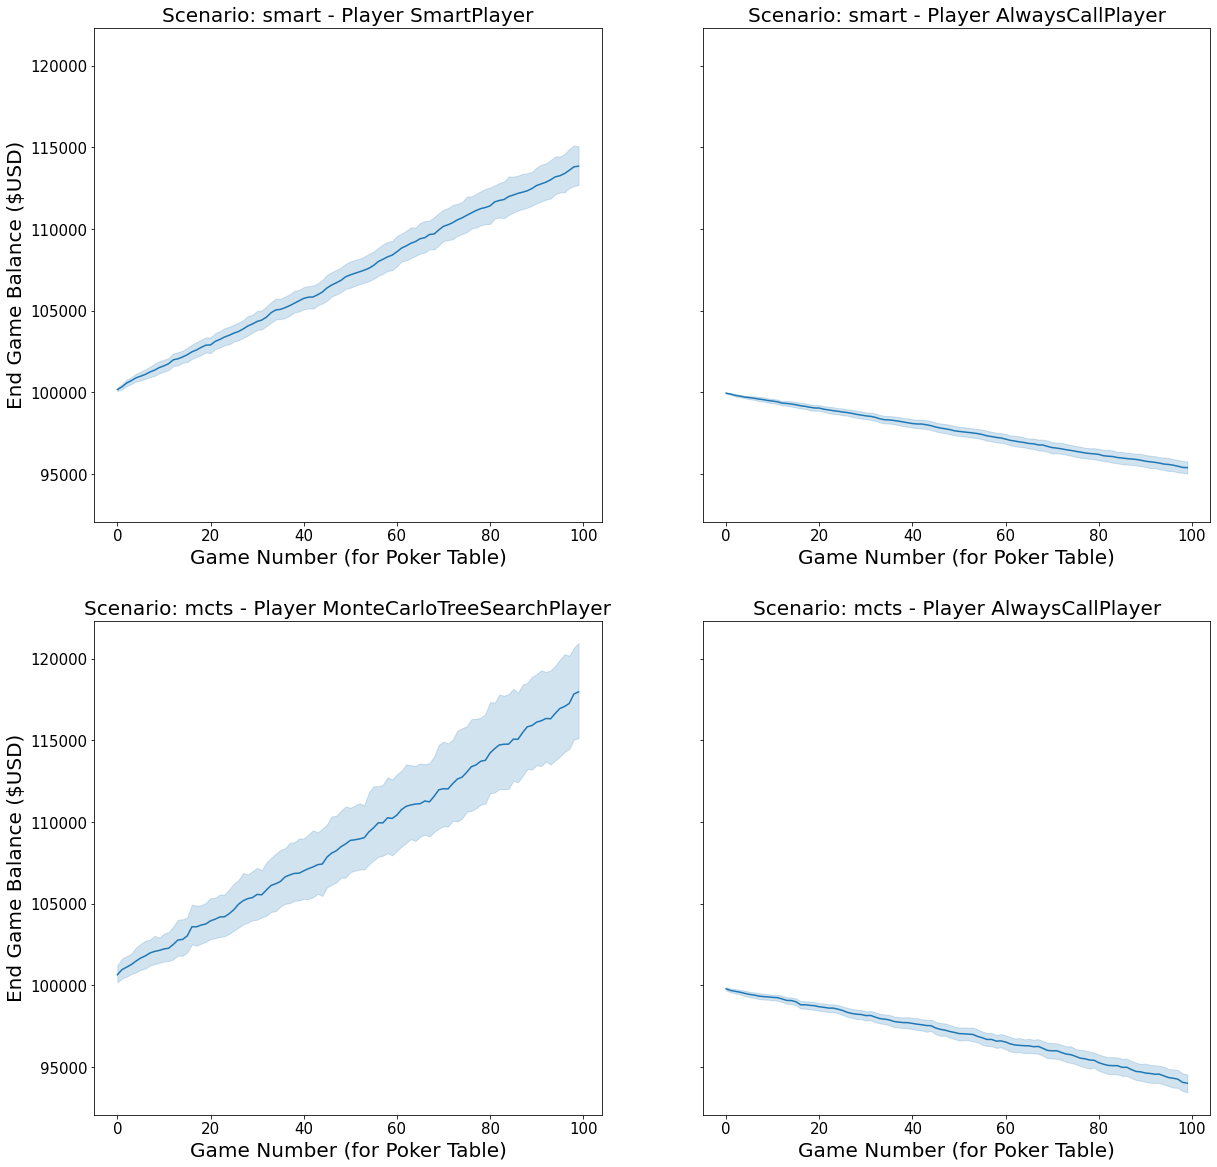

In [39]:
fig, axis = plt.subplots(2,2,figsize=(20, 20),sharey=True)

time_series = games[['category','player_type','game_id','game_end_balance']]
time_series['game_id'] = (time_series['game_id'] - 1) % 100

all_axis = []

for row in axis:
    for col in row:
        all_axis.append(col)
        
        
categories_to_plot = time_series[['category','player_type']].drop_duplicates()
categories_to_plot = categories_to_plot.sort_values(['category','player_type'],ascending=[False,False])

plot_num = 0
for index, row in categories_to_plot.iterrows():
    ax = all_axis[plot_num]
    plot_num += 1
    player_type, category = row['player_type'], row['category']
    query_filter = 'player_type == "{}" and category == "{}"'.format(player_type,category)
    plot_data = time_series.query(query_filter)
    sns.lineplot(x=plot_data['game_id'],y=plot_data['game_end_balance'],ax=ax)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.set_title('Scenario: {} - Player {}'.format(category,player_type),fontsize=20)
    ax.set_ylabel('End Game Balance ($USD)',fontsize=20)
    ax.set_xlabel('Game Number (for Poker Table)',fontsize=20)



In [38]:
categories_to_plot.sort_values(['category','player_type'],ascending=[False,False])

category                 player_type
30000    smart                 SmartPlayer
29900    smart            AlwaysCallPlayer
100       mcts  MonteCarloTreeSearchPlayer
0         mcts            AlwaysCallPlayer

<ipython-input-18-b011ef99eb9c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series['game_id'] = (time_series['game_id'] - 1) % 100


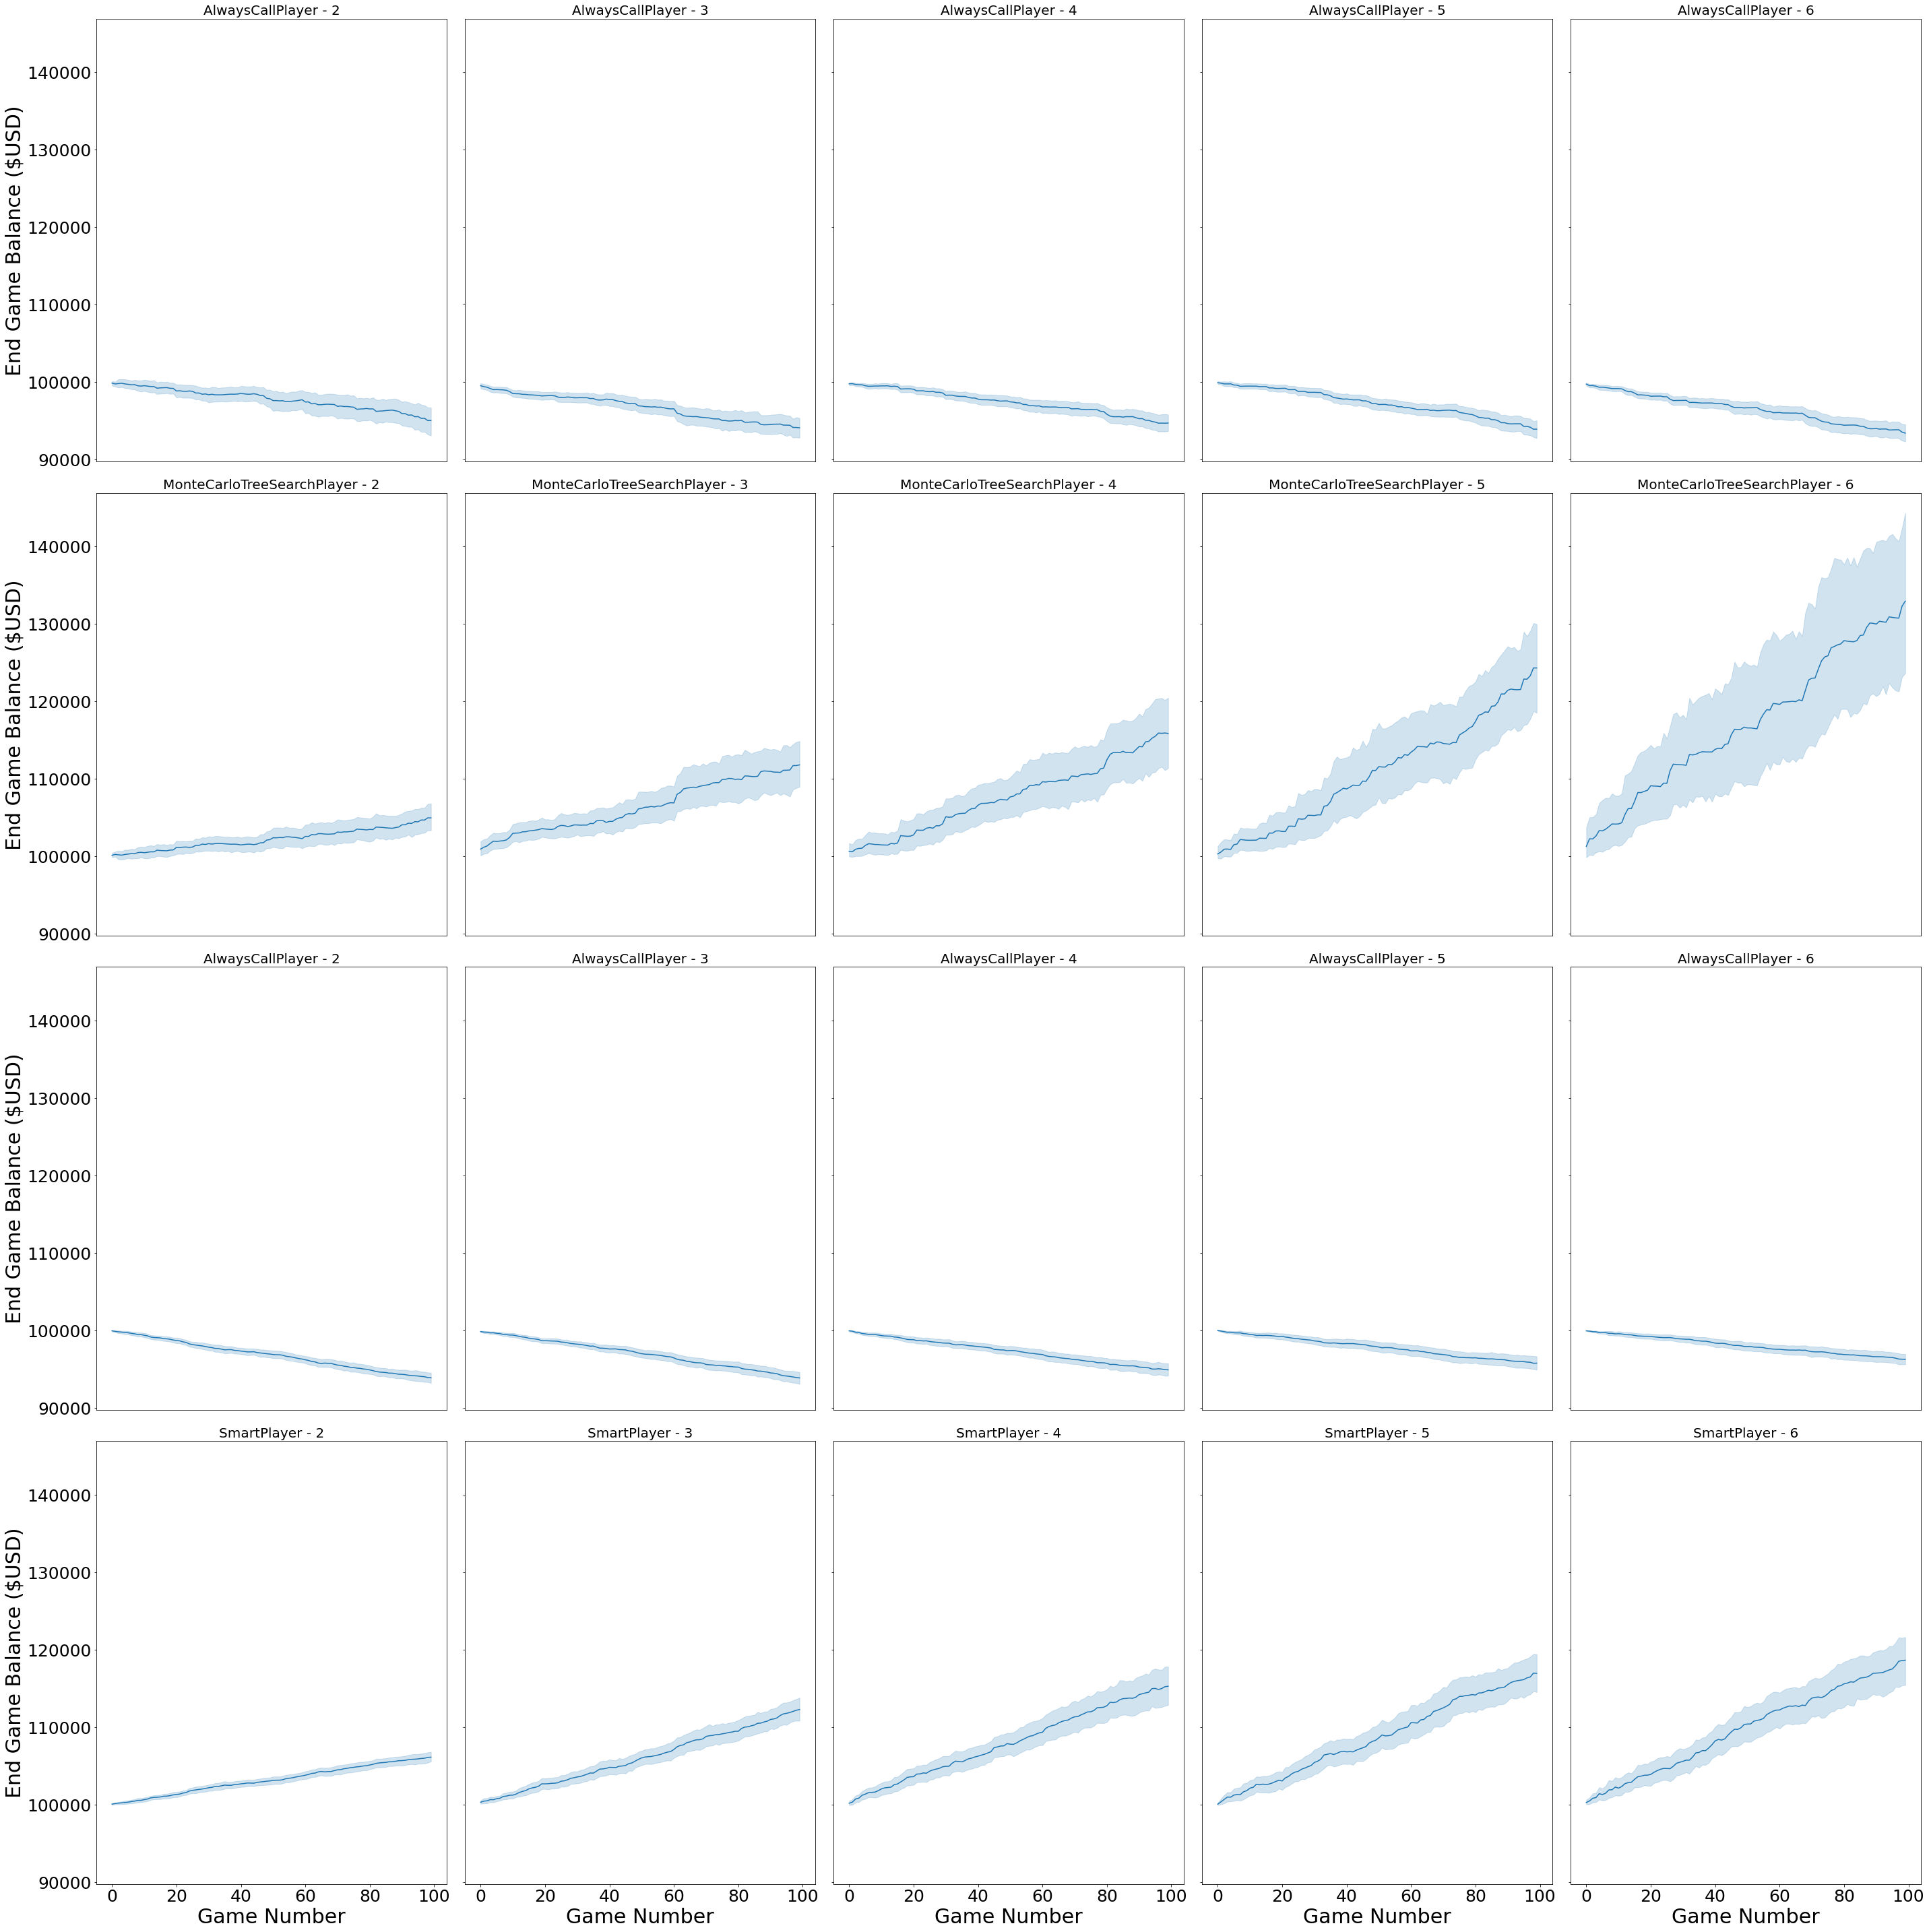

In [18]:
fig, axis = plt.subplots(4,5,figsize=(40, 40),sharey=True)

time_series = games[['category','scenario_name','player_type','game_id','game_end_balance']]
time_series['game_id'] = (time_series['game_id'] - 1) % 100

all_axis = []

for row in axis:
    for col in row:
        all_axis.append(col)
        
categories_to_plot = time_series[['category','scenario_name','player_type']].drop_duplicates()
categories_to_plot['sort_order'] =  categories_to_plot.scenario_name.str.extract('(\d+)')
categories_to_plot = categories_to_plot.sort_values(['category','player_type','sort_order'])

plot_num = 0
for index, row in categories_to_plot.iterrows():
    ax = all_axis[plot_num]
    plot_num += 1
    player_type, category, scenario_name, number = row['player_type'], row['category'], row['scenario_name'], row['sort_order']
    query_filter = 'player_type == "{}" and category == "{}" and scenario_name == "{}"'.format(player_type,category,scenario_name)
    plot_data = time_series.query(query_filter)
    sns.lineplot(x=plot_data['game_id'],y=plot_data['game_end_balance'],ax=ax)
    ax.tick_params(axis='x', labelsize=25)
    ax.tick_params(axis='y', labelsize=25)
    if plot_num > 15:
        ax.set_xlabel('Game Number',fontsize=30)
    else:
        ax.get_xaxis().set_visible(False)
    ax.set_title('{} - {}'.format(player_type,int(number) + 1),fontsize=20)
    ax.set_ylabel('End Game Balance ($USD)',fontsize=30)
    

plt.tight_layout()

# Analysis of 2 Card Games, Flob and River performance

In [19]:
pre_flop_hands = hands.query('community1 == "Z-N/A" and bet_number == 1')
analysis_data = pre_flop_hands[['category','player_type','opponents','hand1','hand2','game_reason','game_net_change']]
analysis_data[['rank1', 'suit1']] = analysis_data['hand1'].str.split('-', 1, expand=True)
analysis_data[['rank2', 'suit2']] = analysis_data['hand2'].str.split('-', 1, expand=True)
analysis_data['same_suit'] = analysis_data['suit1'] == analysis_data['suit2']
analysis_data

c:\users\silbe\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
<ipython-input-19-5a8f8c442f65>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_data['same_suit'] = analysis_data['suit1'] == analysis_data['suit2']


category                 player_type  opponents       hand1  \
0          mcts            AlwaysCallPlayer          1  5-diamonds   
10         mcts            AlwaysCallPlayer          0  3-diamonds   
12         mcts            AlwaysCallPlayer          1    9-spades   
14         mcts            AlwaysCallPlayer          0    4-hearts   
16         mcts            AlwaysCallPlayer          1     8-clubs   
...         ...                         ...        ...         ...   
686417     mcts  MonteCarloTreeSearchPlayer          4    7-spades   
686419     mcts  MonteCarloTreeSearchPlayer          4  5-diamonds   
686420     mcts  MonteCarloTreeSearchPlayer          4    6-hearts   
686422     mcts  MonteCarloTreeSearchPlayer          4     5-clubs   
686423     mcts  MonteCarloTreeSearchPlayer          4    J-spades   

             hand2        game_reason  game_net_change rank1     suit1 rank2  \
0         6-hearts           won_game          0.00000     5  diamonds     6   
10        8-spades  last_man_standing          5.00000     3  diamonds     8   
12         9-clubs           won_game         10.00000     9    spades     9   
14      Q-diamonds  last_man_standing          5.00000     4    hearts     Q   
16      A-diamonds          lost_game      -3310.00000     8     clubs     A   
...            ...                ...              ...   ...       ...   ...   
686417    A-hearts               fold        -10.00000     7    spades     A   
686419     A-clubs               fold          0.00000     5  diamonds     A   
686420    A-hearts               fold       -110.00000     6    hearts     A   
686422  A-diamonds               fold          0.00000     5     clubs     A   
686423     J-clubs          lost_game       -110.00000     J    spades     J   

           suit2  same_suit  
0         hearts      False  
10        spades      False  
12         clubs      False  
14      diamonds      False  
16      diamonds      False  
...          ...        ...  
686417    hearts      False  
686419     clubs      False  
686420    hearts       True  
686422  diamonds      False  
686423     clubs      False  

[120000 rows x 12 columns]

<AxesSubplot:>

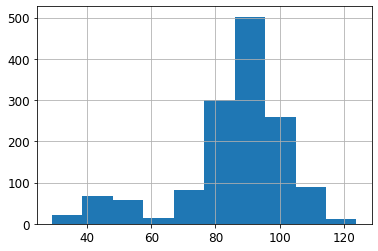

In [20]:
analysis_data.groupby(['hand1','hand2']).game_reason.count().hist()

In [21]:
per_game_type = analysis_data.groupby(['rank1','rank2','game_reason']).category.count().reset_index()
games_total = analysis_data.groupby(['rank1','rank2']).game_net_change.count().reset_index()
pre_flop_data = pd.merge(per_game_type,games_total).sort_values(['rank1','rank2'])
game_stats = pre_flop_data.pivot(index =['rank1','rank2','game_net_change'], columns = ['game_reason'], values =['category']).reset_index()
game_stats.columns = [c[1] if c[1] else c[0] for c in game_stats.columns]
game_stats = game_stats.fillna(0)
game_stats['fold_percent'] = game_stats['fold'] / game_stats['game_net_change']
game_stats['last_man_standing_percent'] = game_stats['last_man_standing'] / game_stats['game_net_change']
game_stats['lost_game_percent'] = game_stats['lost_game'] / game_stats['game_net_change']
game_stats['won_game_percent'] = game_stats['won_game'] / game_stats['game_net_change']
game_stats

rank1 rank2  game_net_change  fold  last_man_standing  lost_game  won_game  \
0     10    10              553    47                 13        246       247   
1     10     A             1492   229                 38        724       501   
2     10     J             1495   261                 32        785       417   
3     10     K             1411   232                 40        699       440   
4     10     Q             1458   224                 30        741       463   
..   ...   ...              ...   ...                ...        ...       ...   
86     K     A             1496   212                 48        698       538   
87     K     K              556    17                 16        210       313   
88     Q     A             1372   189                 27        663       493   
89     Q     K             1430   222                 46        688       474   
90     Q     Q              542    15                 14        244       269   

    fold_percent  last_man_standing_percent  lost_game_percent  \
0        0.08499                    0.02351            0.44485   
1        0.15349                    0.02547            0.48525   
2        0.17458                    0.02140            0.52508   
3        0.16442                    0.02835            0.49539   
4        0.15364                    0.02058            0.50823   
..           ...                        ...                ...   
86       0.14171                    0.03209            0.46658   
87       0.03058                    0.02878            0.37770   
88       0.13776                    0.01968            0.48324   
89       0.15524                    0.03217            0.48112   
90       0.02768                    0.02583            0.45018   

    won_game_percent  
0            0.44665  
1            0.33579  
2            0.27893  
3            0.31184  
4            0.31756  
..               ...  
86           0.35963  
87           0.56295  
88           0.35933  
89           0.33147  
90           0.49631  

[91 rows x 11 columns]

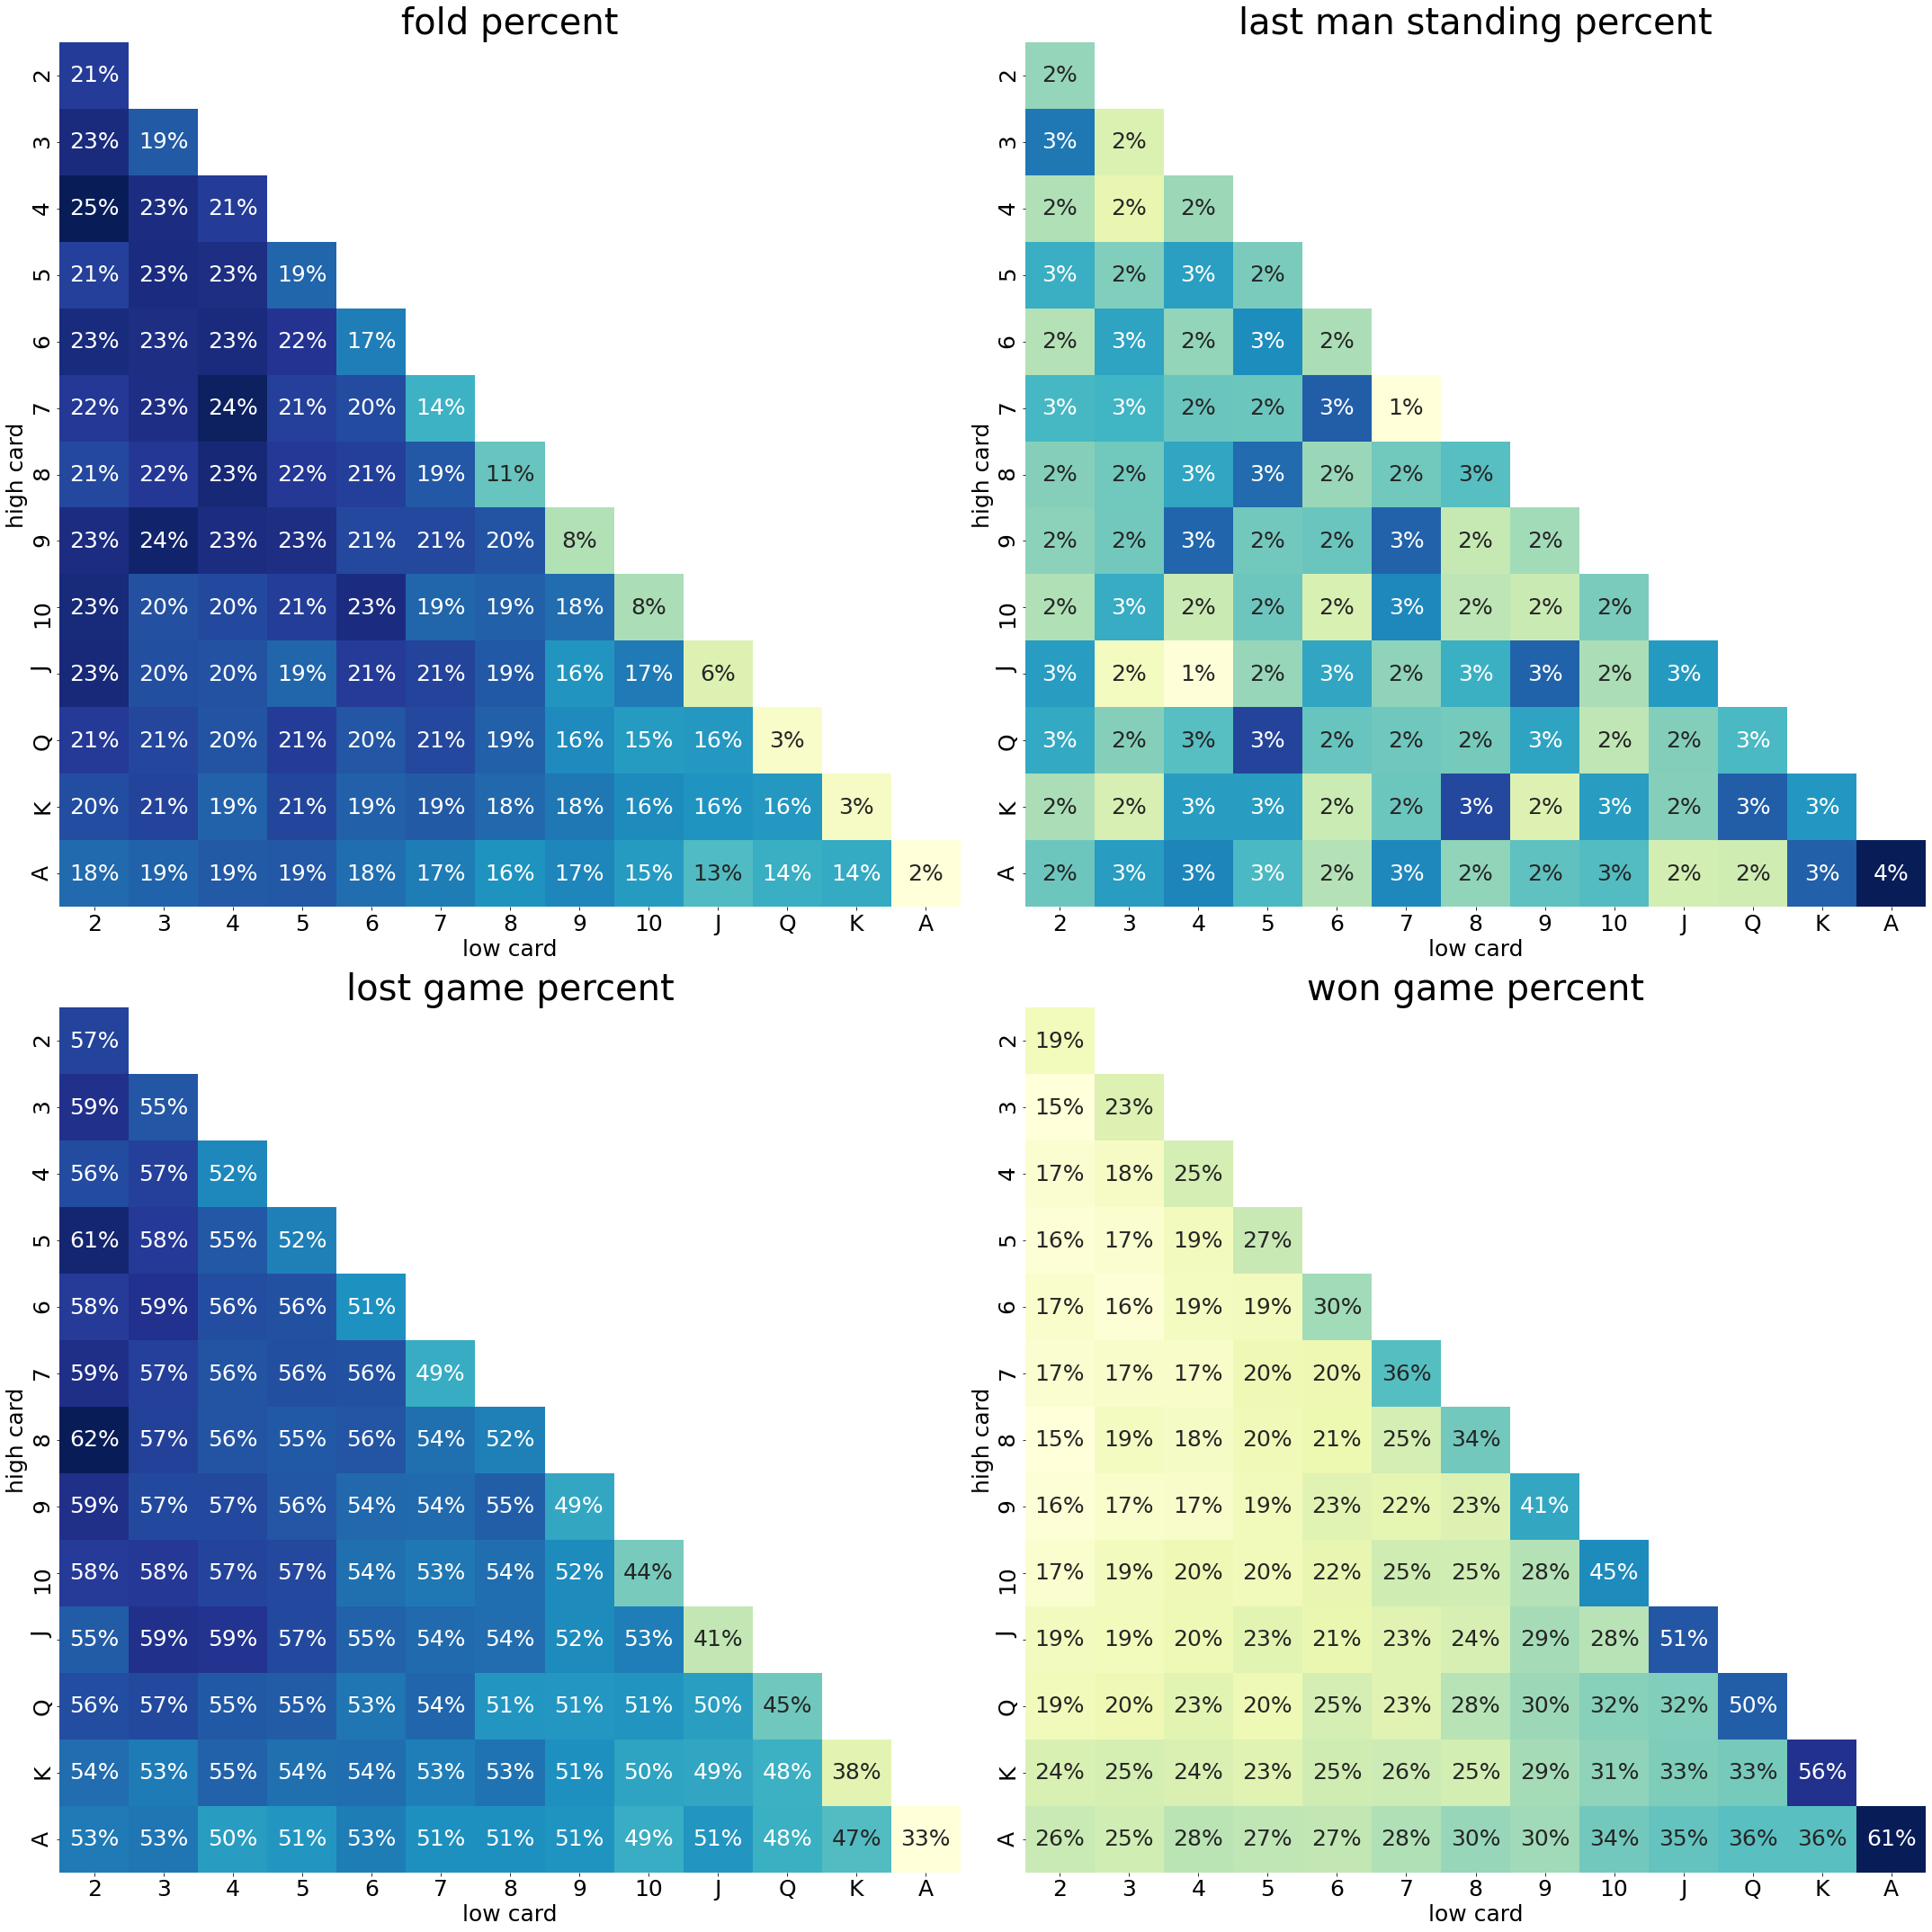

In [22]:
fig, axis = plt.subplots(2,2,figsize=(30, 30))

percentages = game_stats[['rank1','rank2'] + [c for c in game_stats.columns if c.endswith('percent')]].sort_values(['won_game_percent','last_man_standing_percent','fold_percent','lost_game_percent'],ascending=False)

all_axis = []

for row in axis:
    for col in row:
        all_axis.append(col)
        
rank_order = ['2','3','4','5','6','7','8','9','10','J','Q','K','A']

plot_num = 0
for percent in [c for c in percentages.columns if c.endswith('percent')]:
    ax = all_axis[plot_num]
    percents_pivot = percentages.pivot(index='rank2',columns='rank1',values=percent)
    percents_pivot = percents_pivot.loc[rank_order,rank_order]
    sns.heatmap(percents_pivot, annot = True, ax = ax,cmap="YlGnBu",fmt=".0%", annot_kws={'size': 25}, cbar=False)
    ax.set_title(percent.replace('_',' '),fontsize=40)
    ax.set_xlabel('low card',fontsize=25)
    ax.set_ylabel('high card',fontsize=25)
    ax.tick_params(axis='x', labelsize=25)
    ax.tick_params(axis='y', labelsize=25)
    plot_num += 1
    
plt.tight_layout()

In [23]:
per_game_type = analysis_data.groupby(['rank1','rank2','same_suit','game_reason']).category.count().reset_index()
games_total = analysis_data.groupby(['rank1','rank2','same_suit',]).game_net_change.count().reset_index()
pre_flop_data = pd.merge(per_game_type,games_total).sort_values(['rank1','rank2','same_suit'])
game_stats = pre_flop_data.pivot(index =['rank1','rank2','game_net_change','same_suit'], columns = ['game_reason'], values =['category']).reset_index()
game_stats.columns = [c[1] if c[1] else c[0] for c in game_stats.columns]
game_stats = game_stats.fillna(0)
game_stats['fold_percent'] = game_stats['fold'] / game_stats['game_net_change']
game_stats['last_man_standing_percent'] = game_stats['last_man_standing'] / game_stats['game_net_change']
game_stats['lost_game_percent'] = game_stats['lost_game'] / game_stats['game_net_change']
game_stats['won_game_percent'] = game_stats['won_game'] / game_stats['game_net_change']
game_stats

rank1 rank2  game_net_change  same_suit  fold  last_man_standing  \
0      10    10              553      False    47                 13   
1      10     A              372       True    61                 10   
2      10     A             1120      False   168                 28   
3      10     J              397       True    71                  9   
4      10     J             1098      False   190                 23   
..    ...   ...              ...        ...   ...                ...   
164     Q     A              355       True    40                  6   
165     Q     A             1017      False   149                 21   
166     Q     K              344       True    44                  9   
167     Q     K             1086      False   178                 37   
168     Q     Q              542      False    15                 14   

     lost_game  won_game  fold_percent  last_man_standing_percent  \
0          246       247       0.08499                    0.02351   
1          166       135       0.16398                    0.02688   
2          558       366       0.15000                    0.02500   
3          196       121       0.17884                    0.02267   
4          589       296       0.17304                    0.02095   
..         ...       ...           ...                        ...   
164        174       135       0.11268                    0.01690   
165        489       358       0.14651                    0.02065   
166        163       128       0.12791                    0.02616   
167        525       346       0.16390                    0.03407   
168        244       269       0.02768                    0.02583   

     lost_game_percent  won_game_percent  
0              0.44485           0.44665  
1              0.44624           0.36290  
2              0.49821           0.32679  
3              0.49370           0.30479  
4              0.53643           0.26958  
..                 ...               ...  
164            0.49014           0.38028  
165            0.48083           0.35202  
166            0.47384           0.37209  
167            0.48343           0.31860  
168            0.45018           0.49631  

[169 rows x 12 columns]

0.2552057533068766
0.29099283838961004


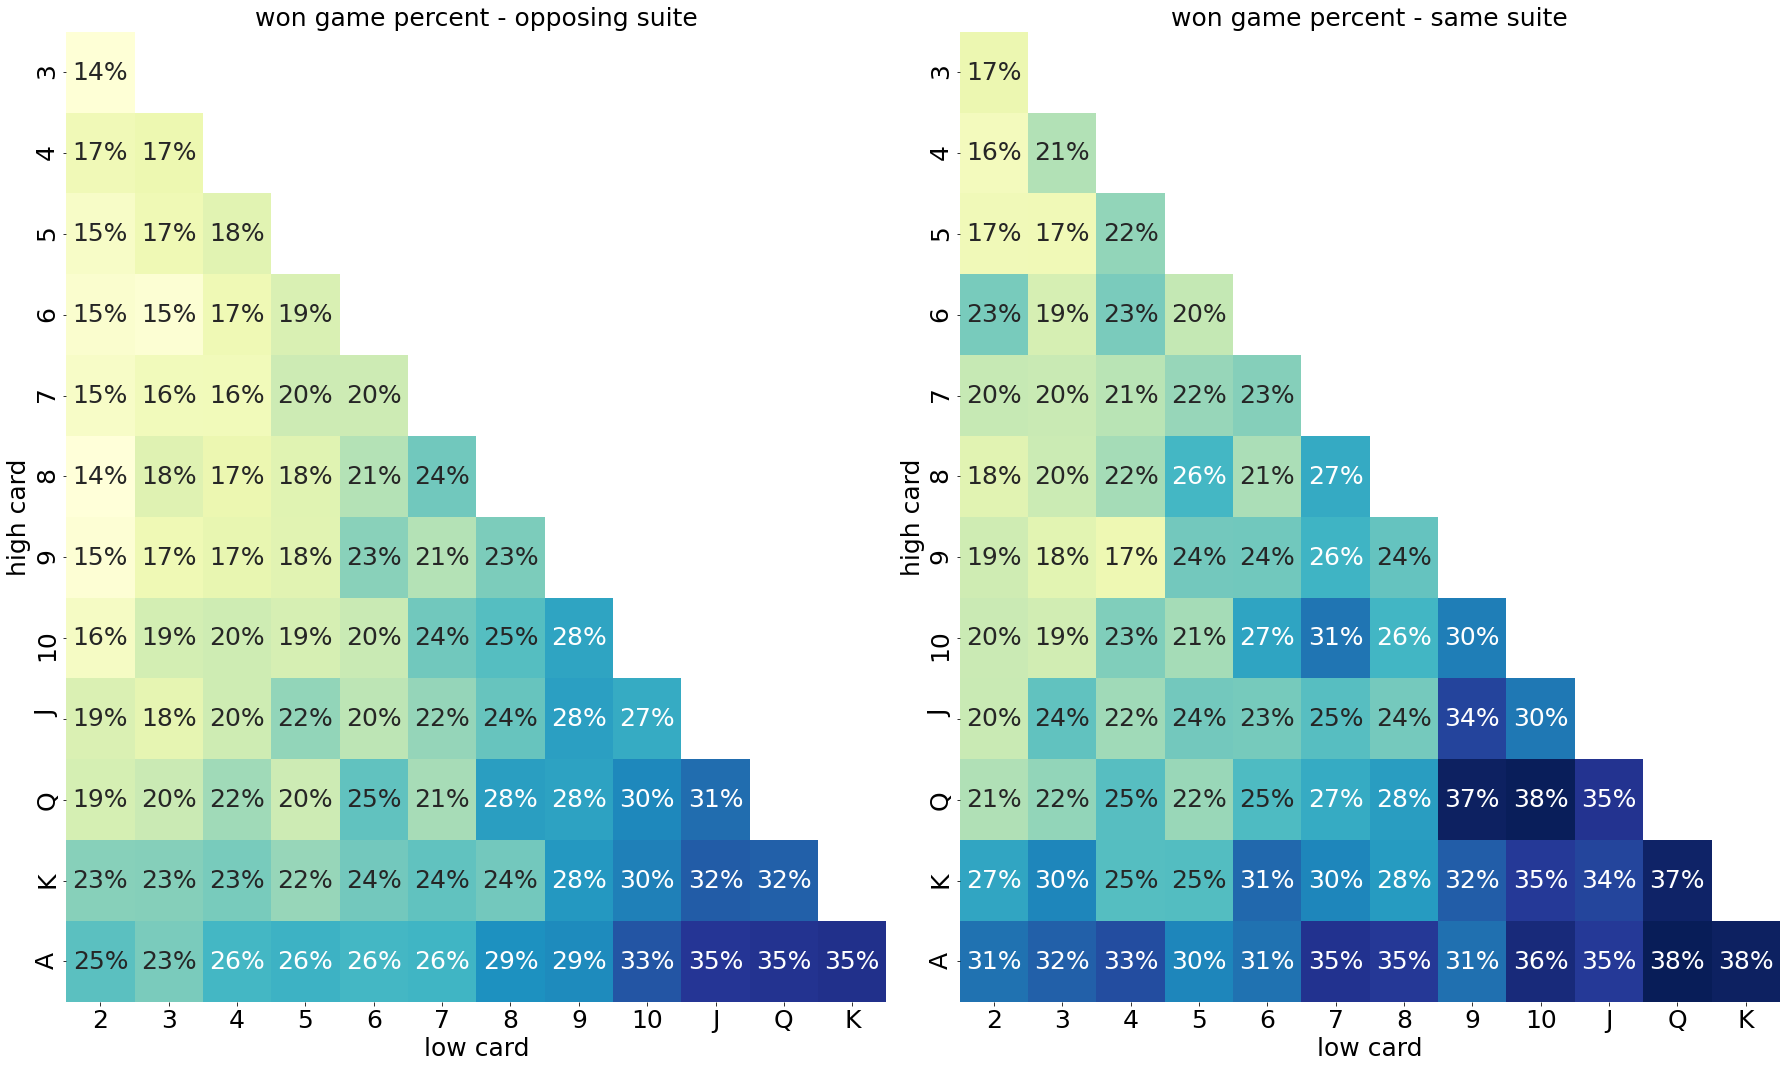

In [24]:
fig, axis = plt.subplots(1,2,figsize=(25, 15))

percentages = game_stats[['rank1','rank2','same_suit','won_game_percent']]

all_axis = []

for row in axis:
    all_axis.append(row)
        
rank_order = ['2','3','4','5','6','7','8','9','10','J','Q','K','A']

max_val = percentages.query("rank1 != rank2").won_game_percent.max()
min_val = percentages.query("rank1 != rank2").won_game_percent.min()

plot_num = 0
for suite_type, percent in ((False,'won_game_percent'),(True,'won_game_percent')):
    ax = all_axis[plot_num]
    filtered_percentages = percentages.query('same_suit == {} and rank1 != rank2'.format(suite_type))
    rank1_order = [rank for rank in rank_order if rank in set(filtered_percentages['rank1'].to_list())]
    rank2_order = [rank for rank in rank_order if rank in set(filtered_percentages['rank2'].to_list())]
    percents_pivot = filtered_percentages.pivot(index='rank2',columns='rank1',values=percent)
    percents_pivot = percents_pivot.loc[rank2_order,rank1_order]
    sns.heatmap(percents_pivot, annot = True, ax = ax,cmap="YlGnBu",fmt=".0%",vmax=max_val, vmin=min_val, annot_kws={'size': 25}, cbar=False)
    ax.set_title(percent.replace('_',' ') + ' - ' + ('same suite' if suite_type else 'opposing suite'),fontsize=25)
    ax.set_xlabel('low card',fontsize=25)
    ax.set_ylabel('high card',fontsize=25)
    ax.tick_params(axis='x', labelsize=25)
    ax.tick_params(axis='y', labelsize=25)
    plot_num += 1
    print(percents_pivot.mean().mean())
    
plt.tight_layout()

In [25]:
per_game_type = analysis_data.groupby(['player_type','rank1','rank2','same_suit','game_reason']).category.count().reset_index()
games_total = analysis_data.groupby(['player_type','rank1','rank2','same_suit',]).game_net_change.count().reset_index()
pre_flop_data = pd.merge(per_game_type,games_total).sort_values(['player_type','rank1','rank2','same_suit'])
game_stats = pre_flop_data.pivot(index =['player_type','rank1','rank2','game_net_change','same_suit'], columns = ['game_reason'], values =['category']).reset_index()
game_stats.columns = [c[1] if c[1] else c[0] for c in game_stats.columns]
game_stats = game_stats.fillna(0)
game_stats['fold_percent'] = game_stats['fold'] / game_stats['game_net_change']
game_stats['last_man_standing_percent'] = game_stats['last_man_standing'] / game_stats['game_net_change']
game_stats['lost_game_percent'] = game_stats['lost_game'] / game_stats['game_net_change']
game_stats['won_game_percent'] = game_stats['won_game'] / game_stats['game_net_change']
game_stats

player_type rank1 rank2  game_net_change  same_suit     fold  \
0    AlwaysCallPlayer    10    10              426      False  0.00000   
1    AlwaysCallPlayer    10     A              271       True  0.00000   
2    AlwaysCallPlayer    10     A              819      False  0.00000   
3    AlwaysCallPlayer    10     J              291       True  0.00000   
4    AlwaysCallPlayer    10     J              832      False  0.00000   
..                ...   ...   ...              ...        ...      ...   
502       SmartPlayer     Q     A               45       True 15.00000   
503       SmartPlayer     Q     A              138      False 73.00000   
504       SmartPlayer     Q     K               48       True 24.00000   
505       SmartPlayer     Q     K              125      False 72.00000   
506       SmartPlayer     Q     Q               76      False  5.00000   

     last_man_standing  lost_game  won_game  fold_percent  \
0             13.00000  217.00000 196.00000       0.00000   
1             10.00000  158.00000 103.00000       0.00000   
2             28.00000  511.00000 280.00000       0.00000   
3              9.00000  185.00000  97.00000       0.00000   
4             23.00000  554.00000 255.00000       0.00000   
..                 ...        ...       ...           ...   
502            0.00000   10.00000  20.00000       0.33333   
503            0.00000   21.00000  44.00000       0.52899   
504            0.00000   10.00000  14.00000       0.50000   
505            0.00000   17.00000  36.00000       0.57600   
506            0.00000   26.00000  45.00000       0.06579   

     last_man_standing_percent  lost_game_percent  won_game_percent  
0                      0.03052            0.50939           0.46009  
1                      0.03690            0.58303           0.38007  
2                      0.03419            0.62393           0.34188  
3                      0.03093            0.63574           0.33333  
4                      0.02764            0.66587           0.30649  
..                         ...                ...               ...  
502                    0.00000            0.22222           0.44444  
503                    0.00000            0.15217           0.31884  
504                    0.00000            0.20833           0.29167  
505                    0.00000            0.13600           0.28800  
506                    0.00000            0.34211           0.59211  

[507 rows x 13 columns]

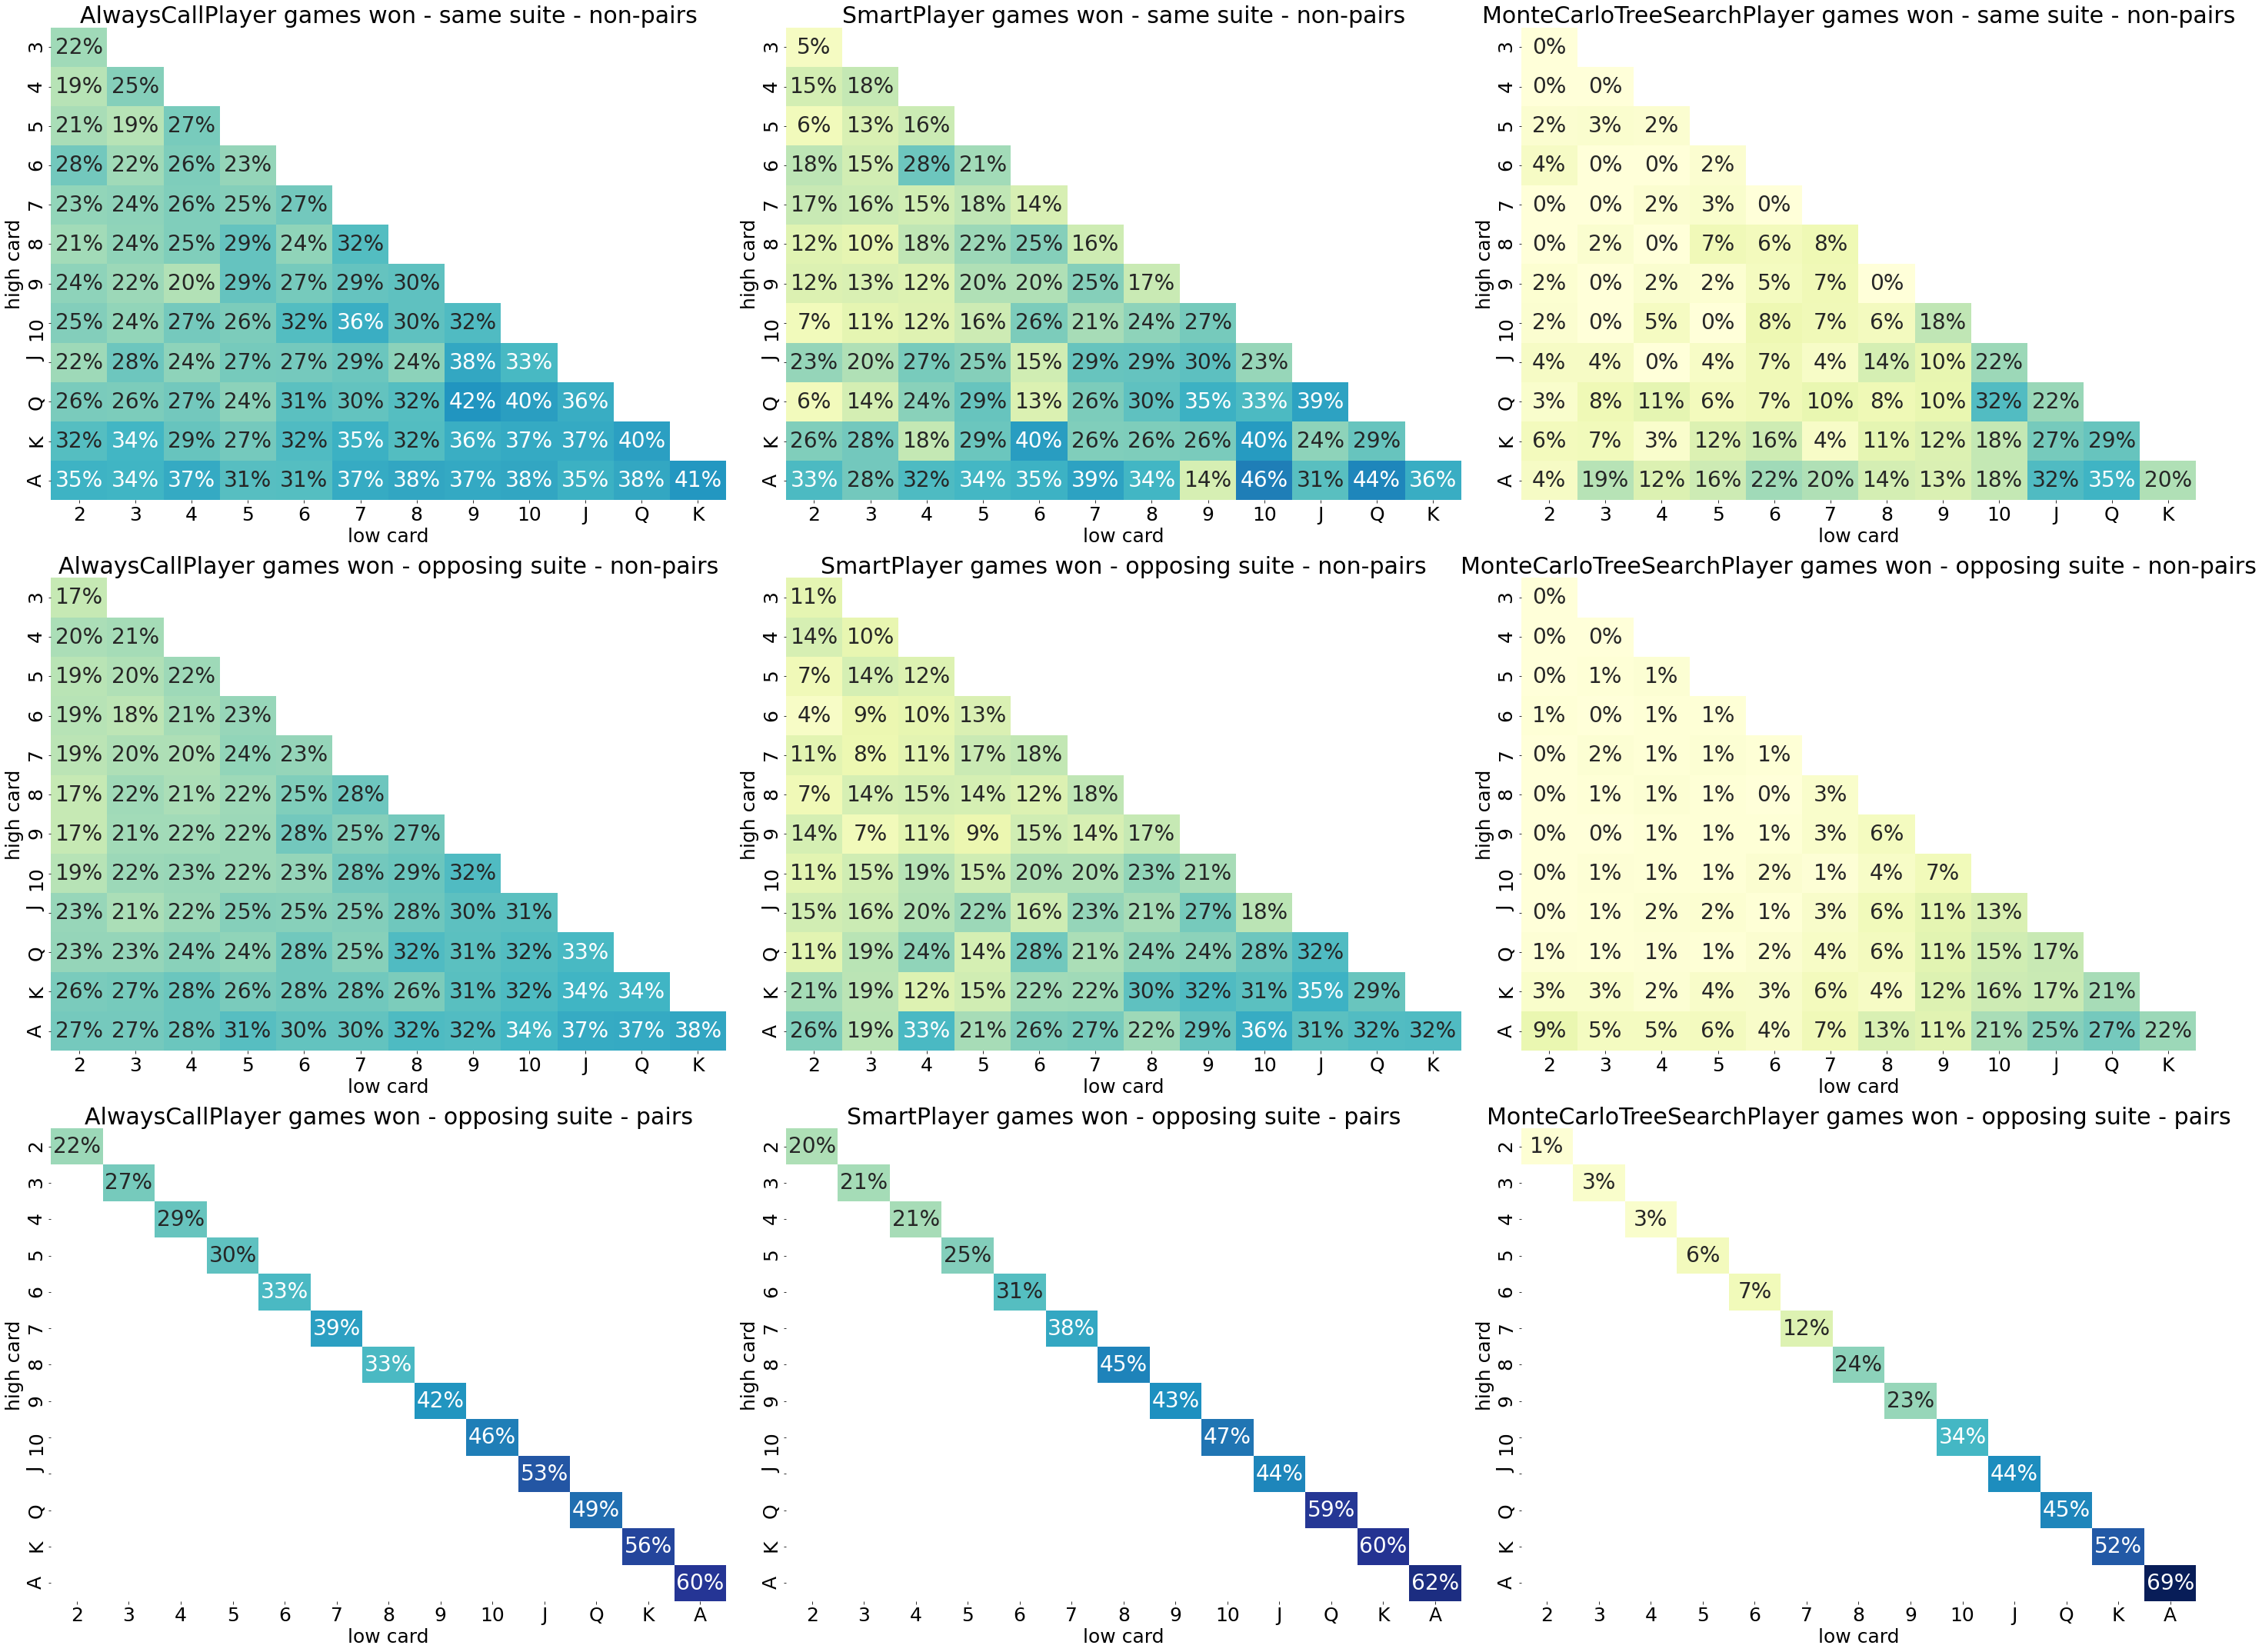

In [26]:
fig, axis = plt.subplots(3,3,figsize=(40, 30))

percentages = game_stats[['player_type','same_suit','rank1','rank2'] + [c for c in game_stats.columns if c.endswith('percent')]].sort_values(['won_game_percent','last_man_standing_percent','fold_percent','lost_game_percent'],ascending=False)

all_axis = []

for row in axis:
    for col in row:
        all_axis.append(col)

rank_order = ['2','3','4','5','6','7','8','9','10','J','Q','K','A']

suite_options = [True, False,False]
rank_options = [False,False,True]
player_type_options = ['AlwaysCallPlayer','SmartPlayer','MonteCarloTreeSearchPlayer']
options = [(suit, rank, player_type, 'won_game_percent') for suit,rank in zip(suite_options,rank_options) for player_type in player_type_options]

max_val = percentages.won_game_percent.max()
min_val = percentages.won_game_percent.min()

plot_num = 0
for suite_type,rank_type, player_type, percent in options:
    ax = all_axis[plot_num]
    if rank_type:
        query = 'same_suit == {} and player_type == "{}" and rank1 == rank2'.format(suite_type,player_type)
    else:
        query = 'same_suit == {} and player_type == "{}" and rank1 != rank2'.format(suite_type,player_type)
    filtered_percentages = percentages.query(query)
    rank1_order = [rank for rank in rank_order if rank in set(filtered_percentages['rank1'].to_list())]
    rank2_order = [rank for rank in rank_order if rank in set(filtered_percentages['rank2'].to_list())]
    percents_pivot = filtered_percentages.pivot(index='rank2',columns='rank1',values=percent)
    percents_pivot = percents_pivot.loc[rank2_order,rank1_order]
    sns.heatmap(percents_pivot, annot = True, ax = ax,cmap="YlGnBu",fmt=".0%",vmax=max_val, vmin=min_val, annot_kws={'size': 28}, cbar=False)
    title = player_type + ' games won - ' + ('same suite - ' if suite_type else 'opposing suite - ') + ('pairs' if rank_type else 'non-pairs') 
    ax.set_title(title,fontsize=30)
    ax.set_xlabel('low card',fontsize=25)
    ax.set_ylabel('high card',fontsize=25)
    ax.tick_params(axis='x', labelsize=25)
    ax.tick_params(axis='y', labelsize=25)
    plot_num += 1
    
plt.tight_layout()

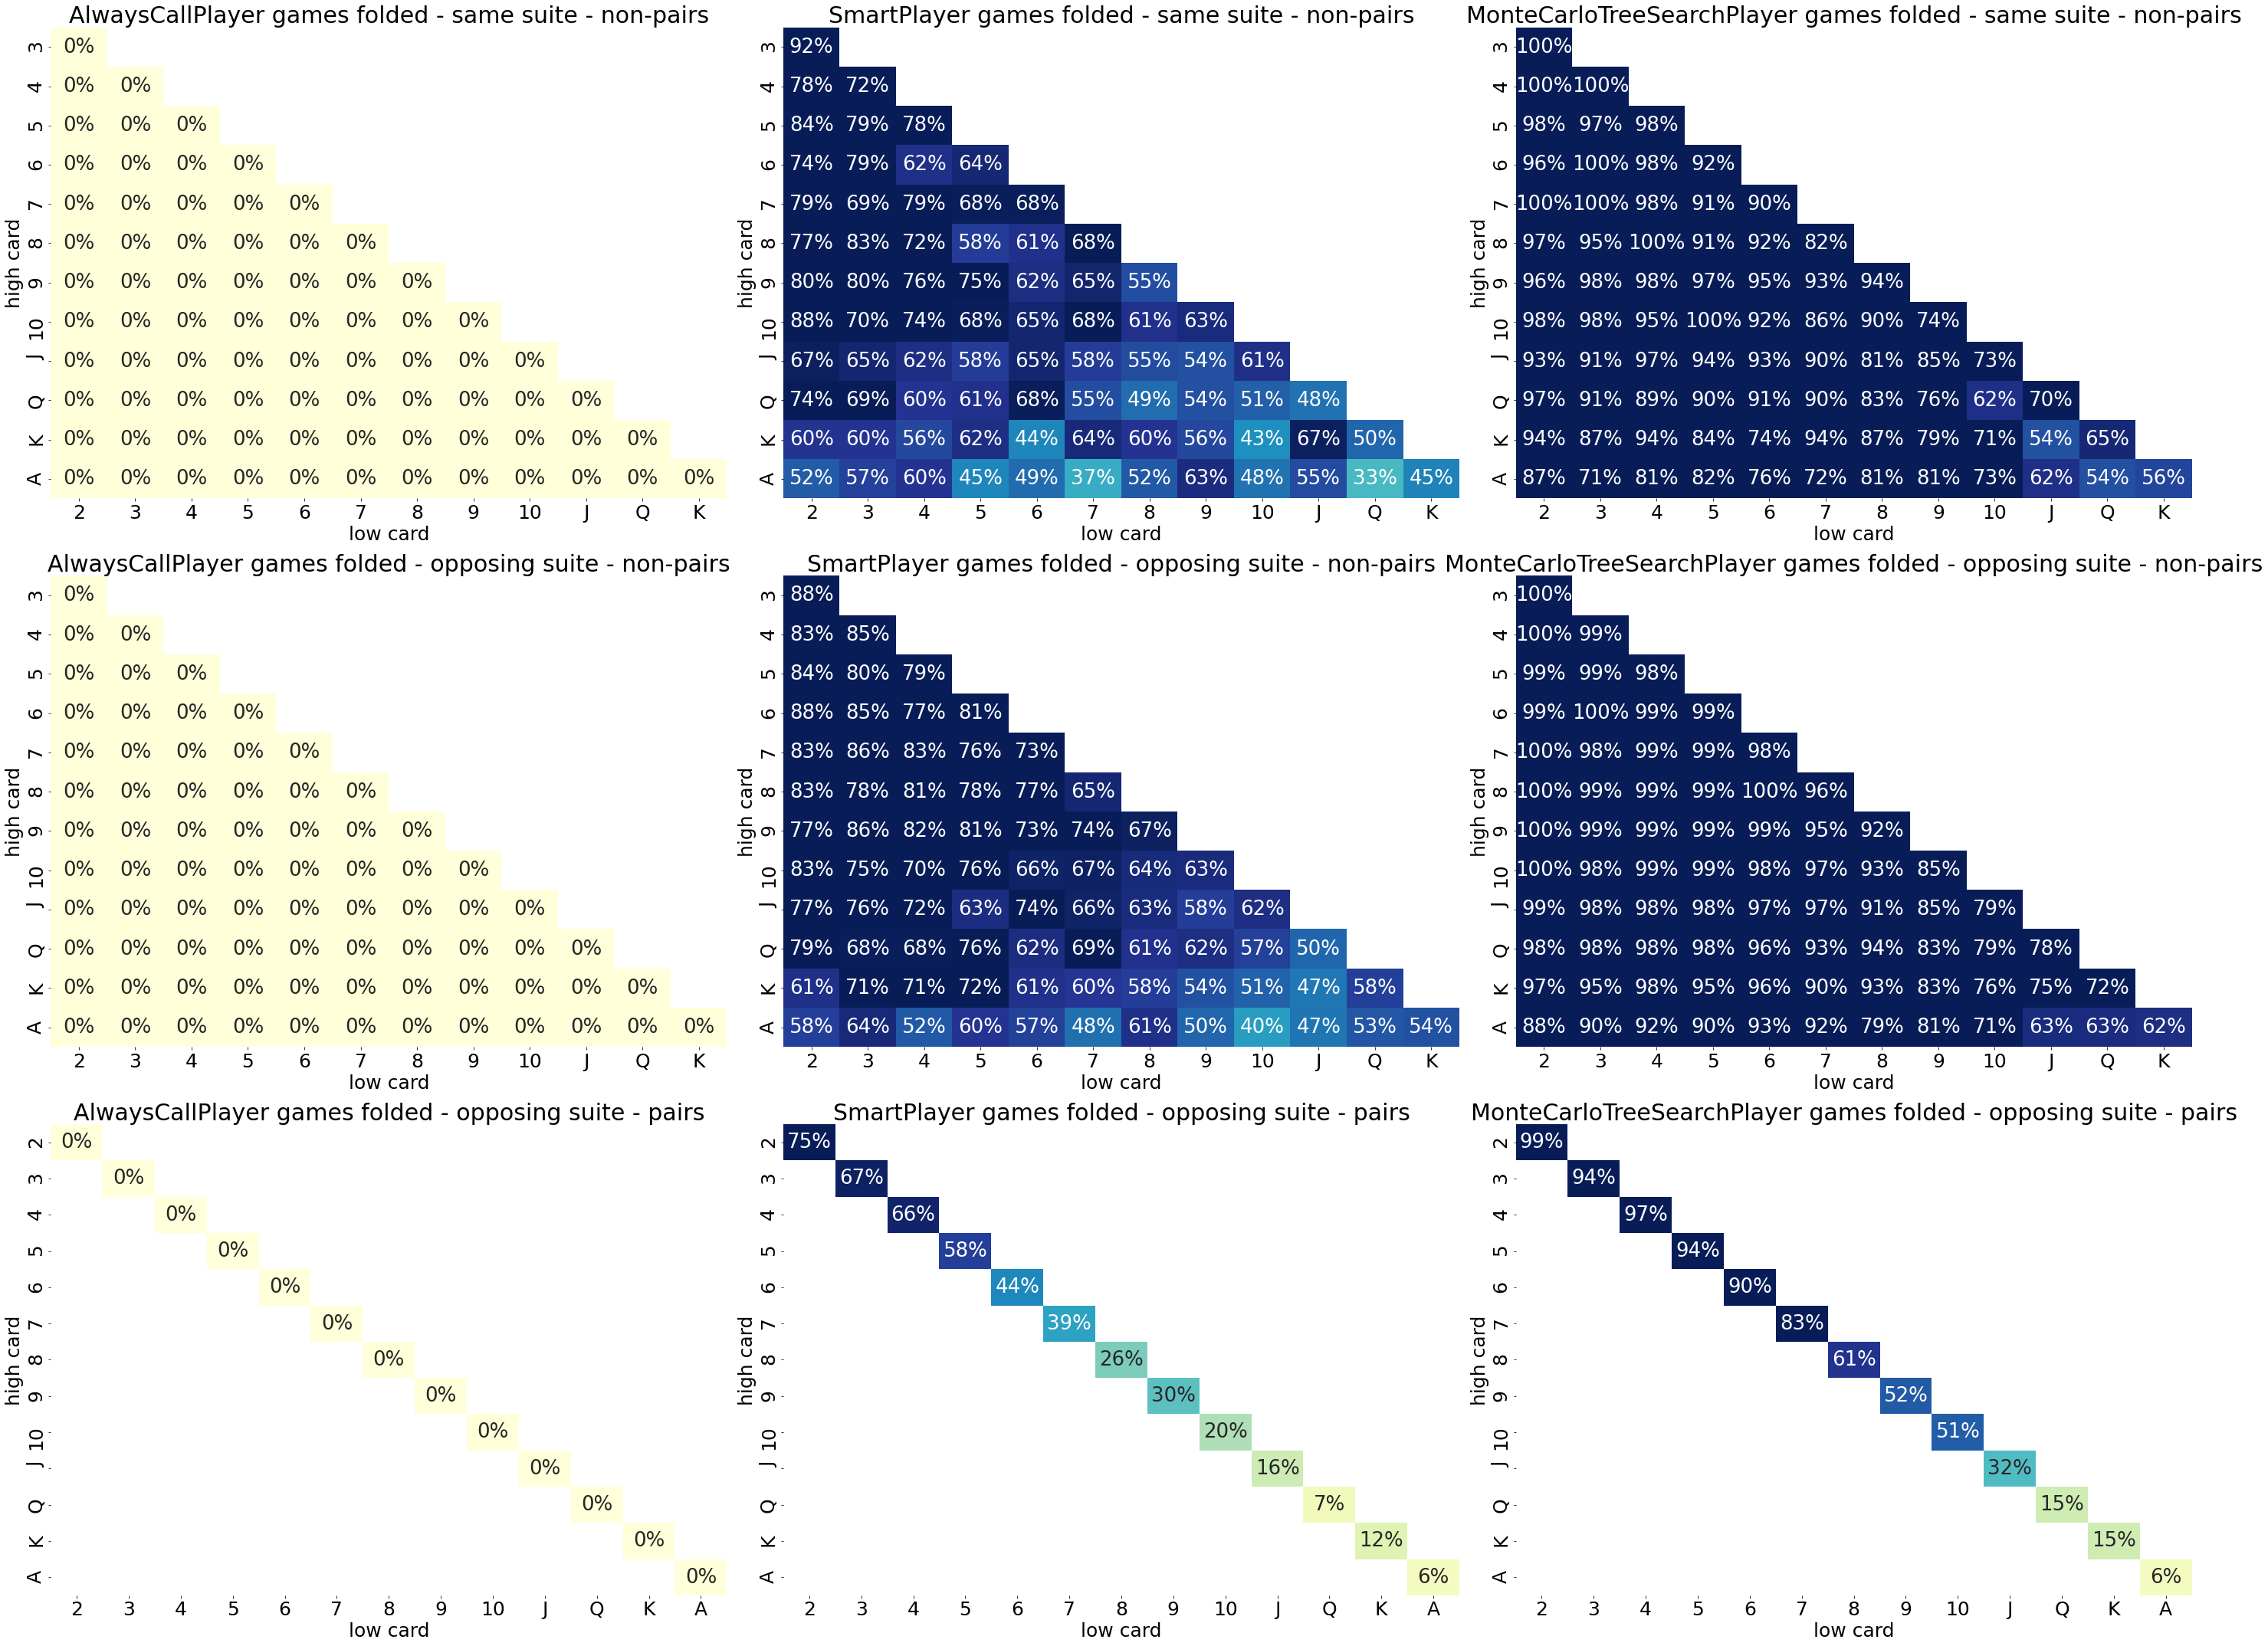

In [27]:
fig, axis = plt.subplots(3,3,figsize=(40, 30))

percentages = game_stats[['player_type','same_suit','rank1','rank2'] + [c for c in game_stats.columns if c.endswith('percent')]].sort_values(['won_game_percent','last_man_standing_percent','fold_percent','lost_game_percent'],ascending=False)

all_axis = []

for row in axis:
    for col in row:
        all_axis.append(col)

rank_order = ['2','3','4','5','6','7','8','9','10','J','Q','K','A']

suite_options = [True, False,False]
rank_options = [False,False,True]
player_type_options = ['AlwaysCallPlayer','SmartPlayer','MonteCarloTreeSearchPlayer']
options = [(suit, rank, player_type, 'fold_percent') for suit,rank in zip(suite_options,rank_options) for player_type in player_type_options]

max_val = percentages.won_game_percent.max()
min_val = percentages.won_game_percent.min()

plot_num = 0
for suite_type,rank_type, player_type, percent in options:
    ax = all_axis[plot_num]
    if rank_type:
        query = 'same_suit == {} and player_type == "{}" and rank1 == rank2'.format(suite_type,player_type)
    else:
        query = 'same_suit == {} and player_type == "{}" and rank1 != rank2'.format(suite_type,player_type)
    filtered_percentages = percentages.query(query)
    rank1_order = [rank for rank in rank_order if rank in set(filtered_percentages['rank1'].to_list())]
    rank2_order = [rank for rank in rank_order if rank in set(filtered_percentages['rank2'].to_list())]
    percents_pivot = filtered_percentages.pivot(index='rank2',columns='rank1',values=percent)
    percents_pivot = percents_pivot.loc[rank2_order,rank1_order]
    sns.heatmap(percents_pivot, annot = True, ax = ax,cmap="YlGnBu",fmt=".0%",vmax=max_val, vmin=min_val, annot_kws={'size': 26}, cbar=False)
    title = player_type + ' games folded - ' + ('same suite - ' if suite_type else 'opposing suite - ') + ('pairs' if rank_type else 'non-pairs') 
    ax.set_title(title,fontsize=30)
    ax.set_xlabel('low card',fontsize=25)
    ax.set_ylabel('high card',fontsize=25)
    ax.tick_params(axis='x', labelsize=25)
    ax.tick_params(axis='y', labelsize=25)
    plot_num += 1
    
plt.tight_layout()

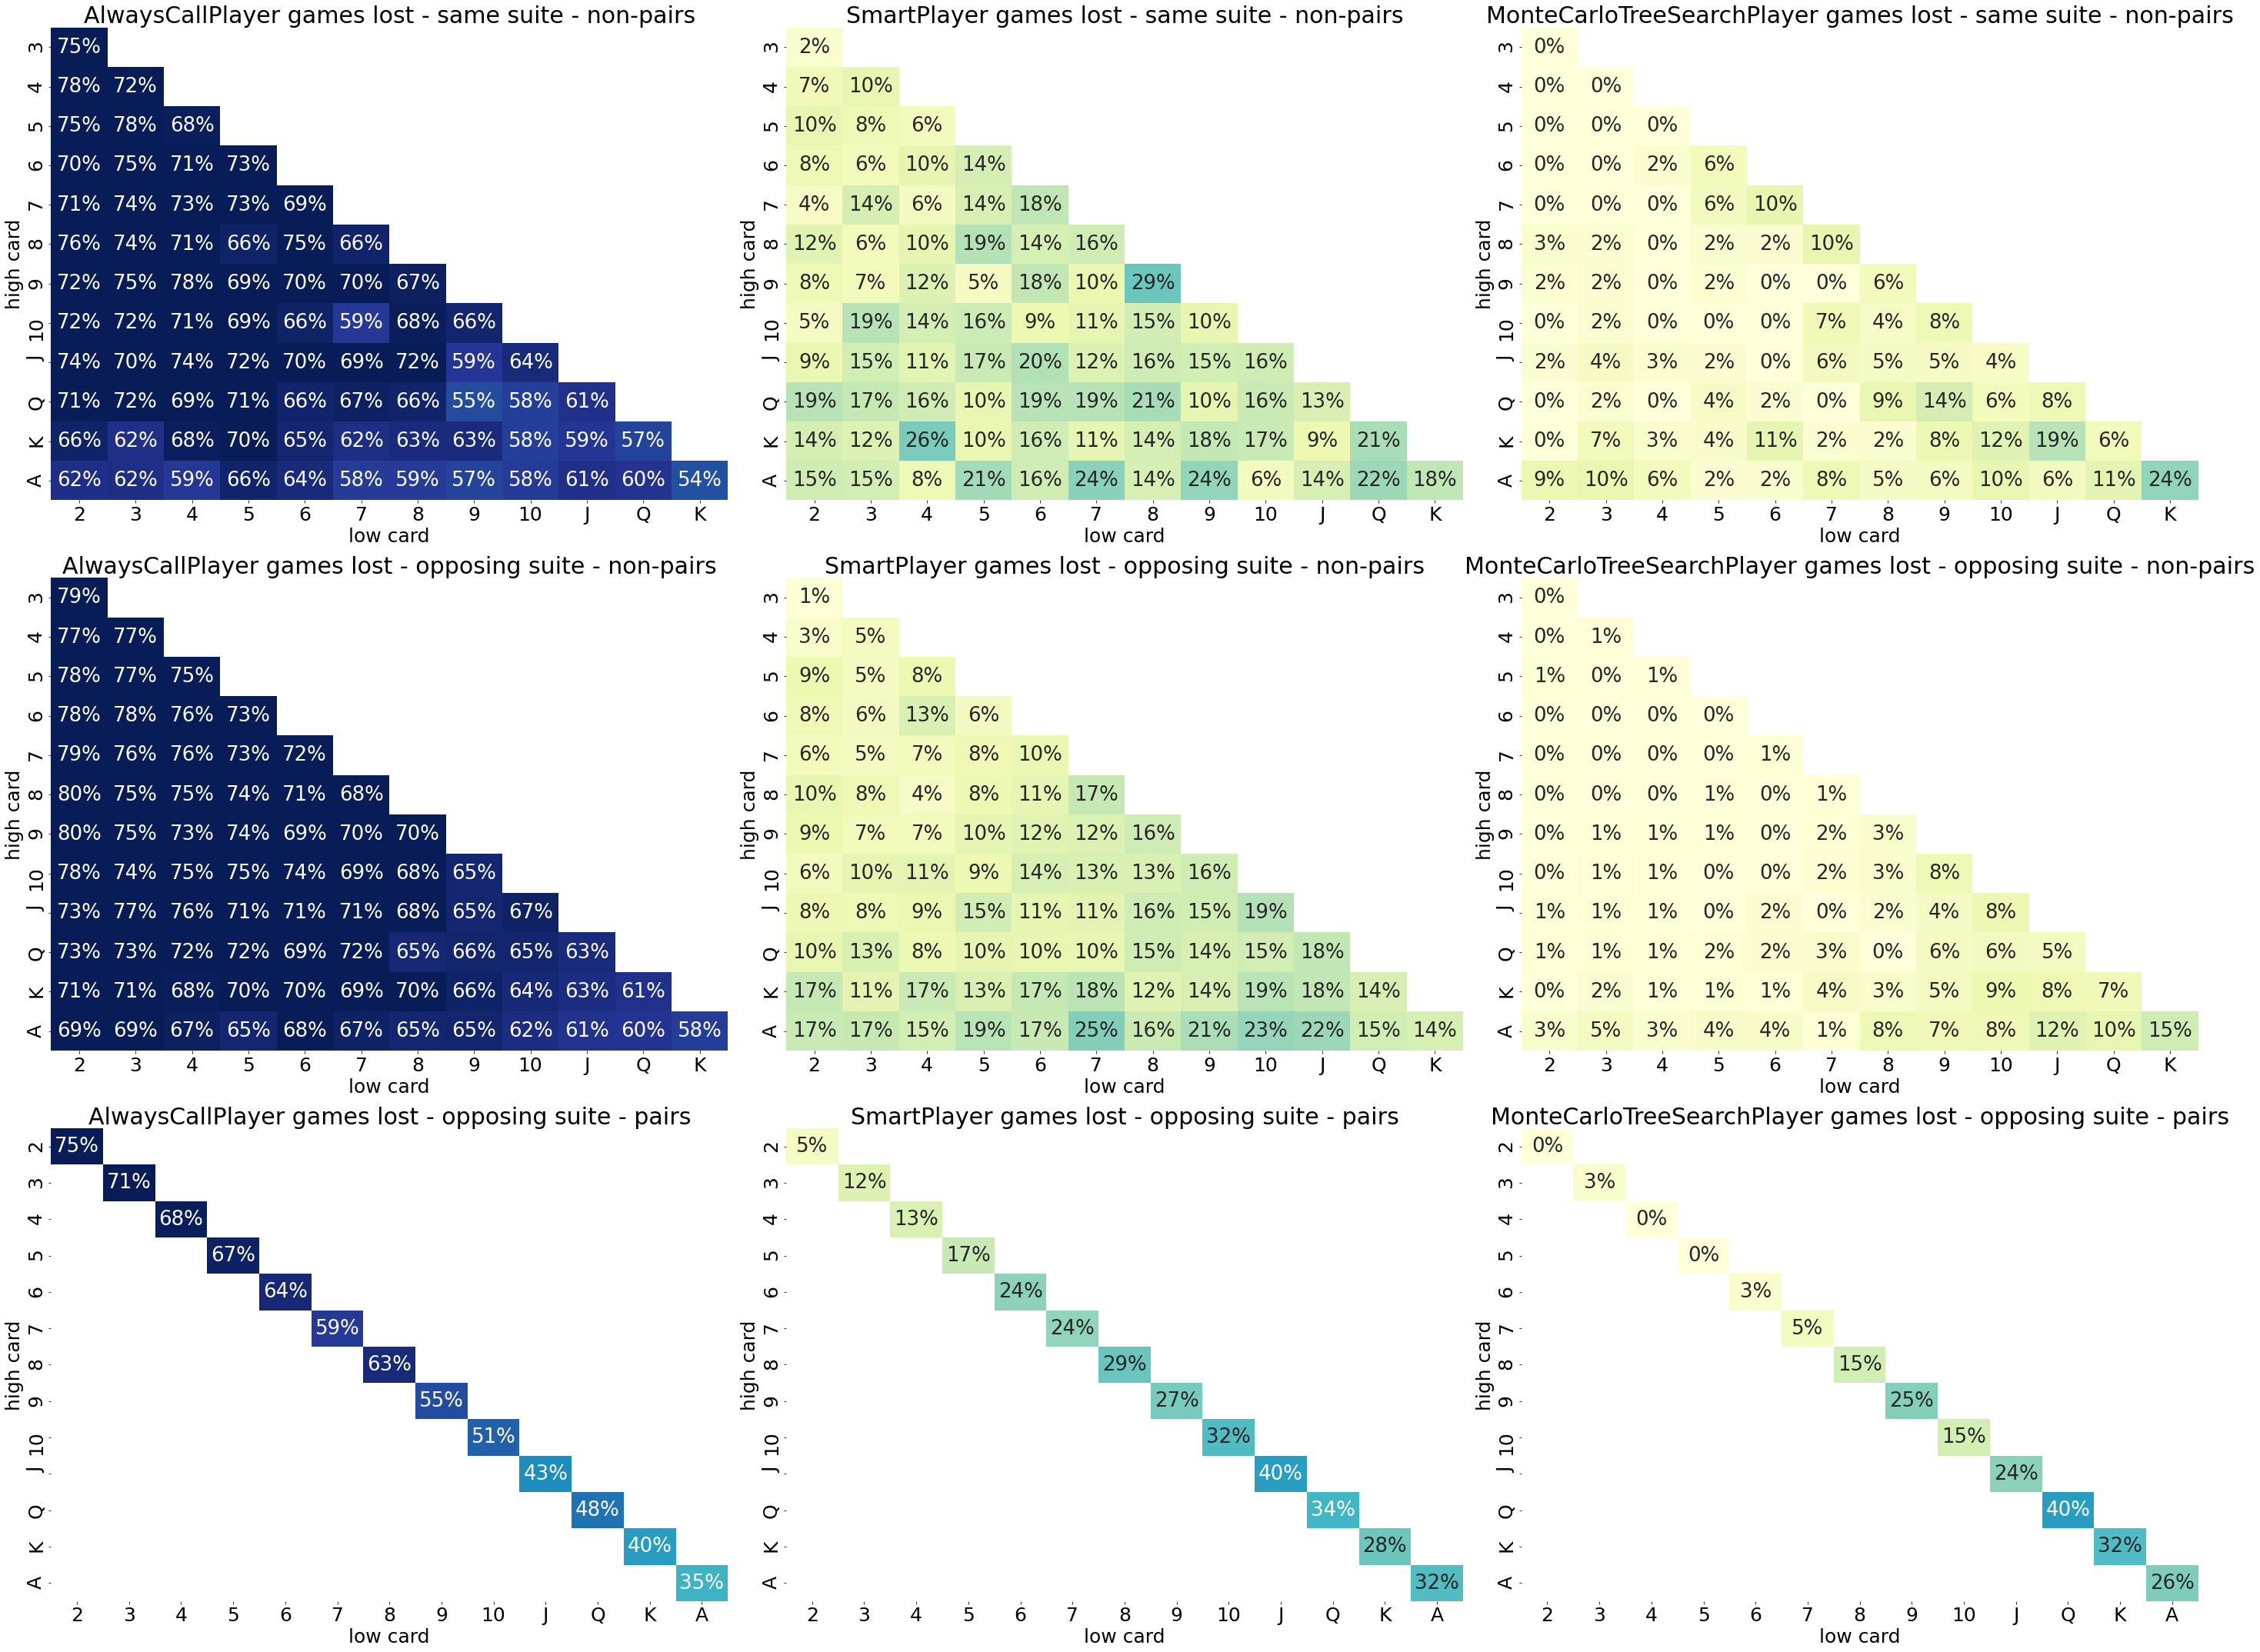

In [28]:
fig, axis = plt.subplots(3,3,figsize=(40, 30))

percentages = game_stats[['player_type','same_suit','rank1','rank2'] + [c for c in game_stats.columns if c.endswith('percent')]].sort_values(['won_game_percent','last_man_standing_percent','fold_percent','lost_game_percent'],ascending=False)

all_axis = []

for row in axis:
    for col in row:
        all_axis.append(col)

rank_order = ['2','3','4','5','6','7','8','9','10','J','Q','K','A']

suite_options = [True, False,False]
rank_options = [False,False,True]
player_type_options = ['AlwaysCallPlayer','SmartPlayer','MonteCarloTreeSearchPlayer']
options = [(suit, rank, player_type, 'lost_game_percent') for suit,rank in zip(suite_options,rank_options) for player_type in player_type_options]

max_val = percentages.won_game_percent.max()
min_val = percentages.won_game_percent.min()

plot_num = 0
for suite_type,rank_type, player_type, percent in options:
    ax = all_axis[plot_num]
    if rank_type:
        query = 'same_suit == {} and player_type == "{}" and rank1 == rank2'.format(suite_type,player_type)
    else:
        query = 'same_suit == {} and player_type == "{}" and rank1 != rank2'.format(suite_type,player_type)
    filtered_percentages = percentages.query(query)
    rank1_order = [rank for rank in rank_order if rank in set(filtered_percentages['rank1'].to_list())]
    rank2_order = [rank for rank in rank_order if rank in set(filtered_percentages['rank2'].to_list())]
    percents_pivot = filtered_percentages.pivot(index='rank2',columns='rank1',values=percent)
    percents_pivot = percents_pivot.loc[rank2_order,rank1_order]
    sns.heatmap(percents_pivot, annot = True, ax = ax,cmap="YlGnBu",fmt=".0%",vmax=max_val, vmin=min_val, annot_kws={'size': 26}, cbar=False)
    title = player_type + ' games lost - ' + ('same suite - ' if suite_type else 'opposing suite - ') + ('pairs' if rank_type else 'non-pairs') 
    ax.set_title(title,fontsize=30)
    ax.set_xlabel('low card',fontsize=25)
    ax.set_ylabel('high card',fontsize=25)
    ax.tick_params(axis='x', labelsize=25)
    ax.tick_params(axis='y', labelsize=25)
    plot_num += 1
    
plt.tight_layout()

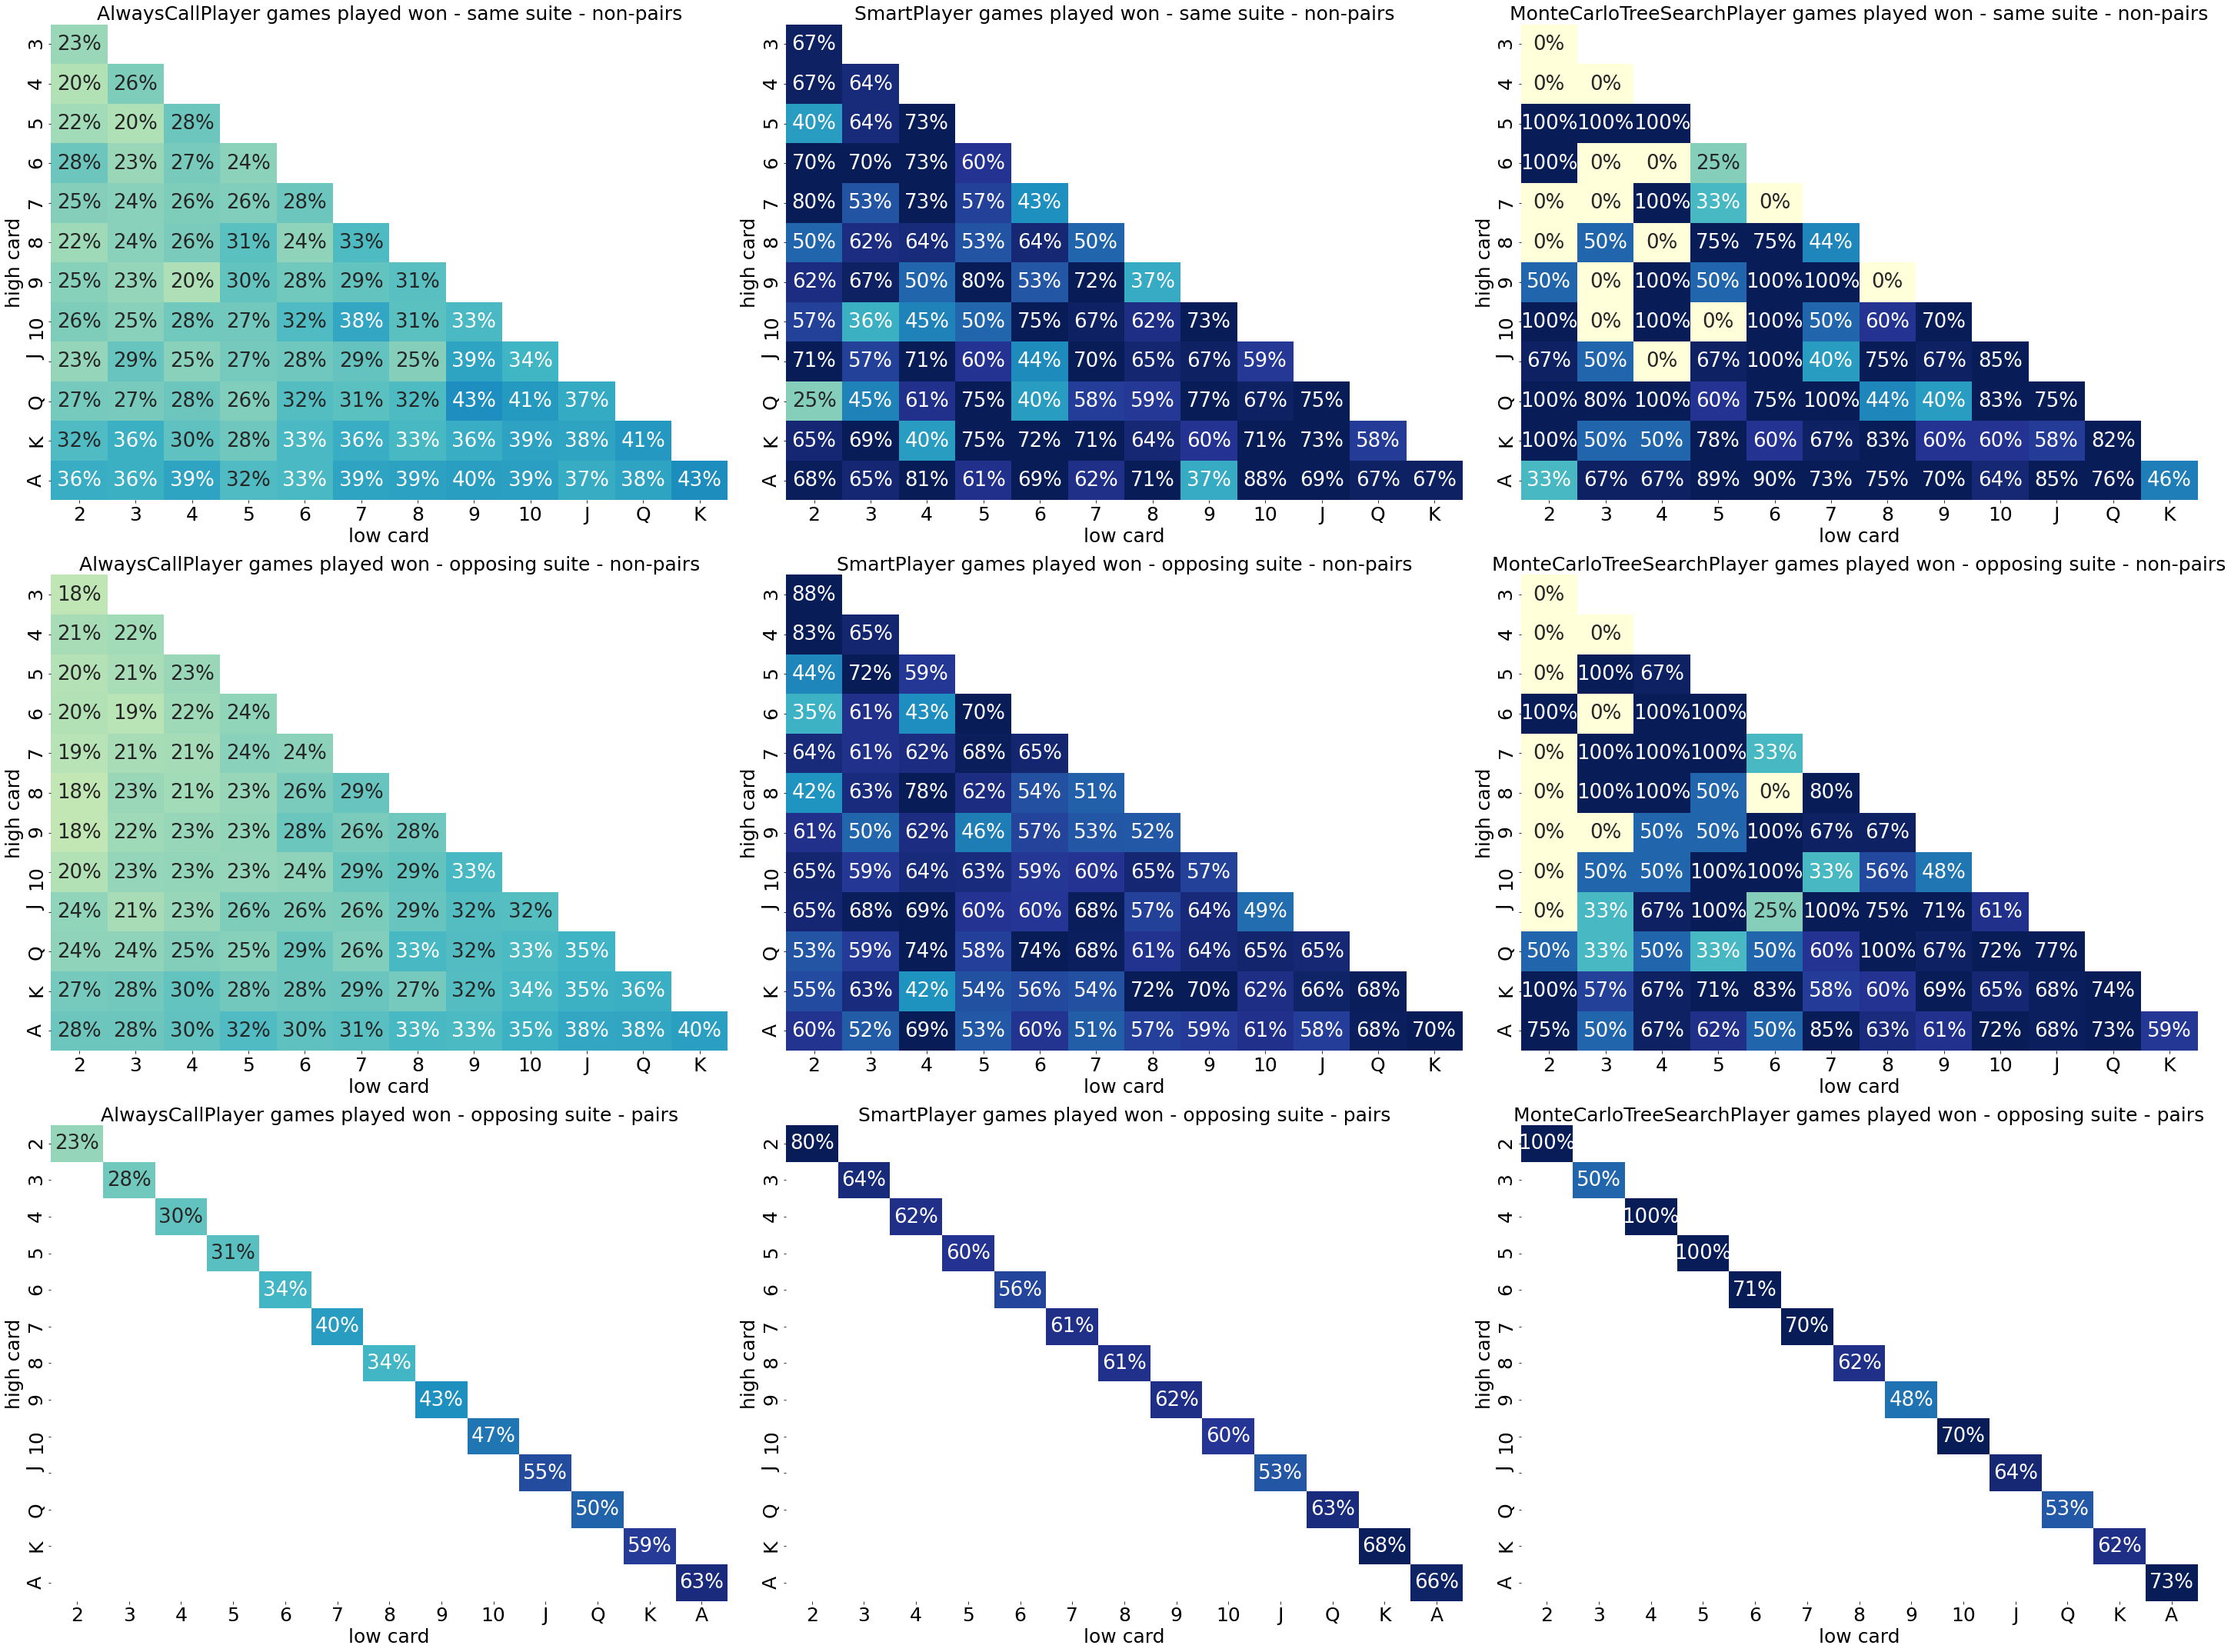

In [29]:
fig, axis = plt.subplots(3,3,figsize=(40, 30))

percentages = game_stats[['player_type','same_suit','rank1','rank2'] + [c for c in game_stats.columns if c.endswith('percent')]].sort_values(['won_game_percent','last_man_standing_percent','fold_percent','lost_game_percent'],ascending=False)
percentages['game_played_percent'] = (percentages['lost_game_percent'] + percentages['won_game_percent'])
percentages['played_win_percent'] = (np.where(percentages['game_played_percent'] > 0, percentages['won_game_percent'], 0) / percentages['game_played_percent']).fillna(0)
                                     
            
all_axis = []

for row in axis:
    for col in row:
        all_axis.append(col)

rank_order = ['2','3','4','5','6','7','8','9','10','J','Q','K','A']

suite_options = [True, False,False]
rank_options = [False,False,True]
player_type_options = ['AlwaysCallPlayer','SmartPlayer','MonteCarloTreeSearchPlayer']
options = [(suit, rank, player_type, 'played_win_percent') for suit,rank in zip(suite_options,rank_options) for player_type in player_type_options]

max_val = percentages.won_game_percent.max()
min_val = percentages.won_game_percent.min()

plot_num = 0
for suite_type,rank_type, player_type, percent in options:
    ax = all_axis[plot_num]
    if rank_type:
        query = 'same_suit == {} and player_type == "{}" and rank1 == rank2'.format(suite_type,player_type)
    else:
        query = 'same_suit == {} and player_type == "{}" and rank1 != rank2'.format(suite_type,player_type)
    filtered_percentages = percentages.query(query)
    rank1_order = [rank for rank in rank_order if rank in set(filtered_percentages['rank1'].to_list())]
    rank2_order = [rank for rank in rank_order if rank in set(filtered_percentages['rank2'].to_list())]
    percents_pivot = filtered_percentages.pivot(index='rank2',columns='rank1',values=percent)
    percents_pivot = percents_pivot.loc[rank2_order,rank1_order]
    sns.heatmap(percents_pivot, annot = True, ax = ax,cmap="YlGnBu",fmt=".0%",vmax=max_val, vmin=min_val, annot_kws={'size': 26}, cbar=False)
    title = player_type + ' games played won - ' + ('same suite - ' if suite_type else 'opposing suite - ') + ('pairs' if rank_type else 'non-pairs') 
    ax.set_title(title,fontsize=25)
    ax.set_xlabel('low card',fontsize=25)
    ax.set_ylabel('high card',fontsize=25)
    ax.tick_params(axis='x', labelsize=25)
    ax.tick_params(axis='y', labelsize=25)
    plot_num += 1
    
plt.tight_layout()

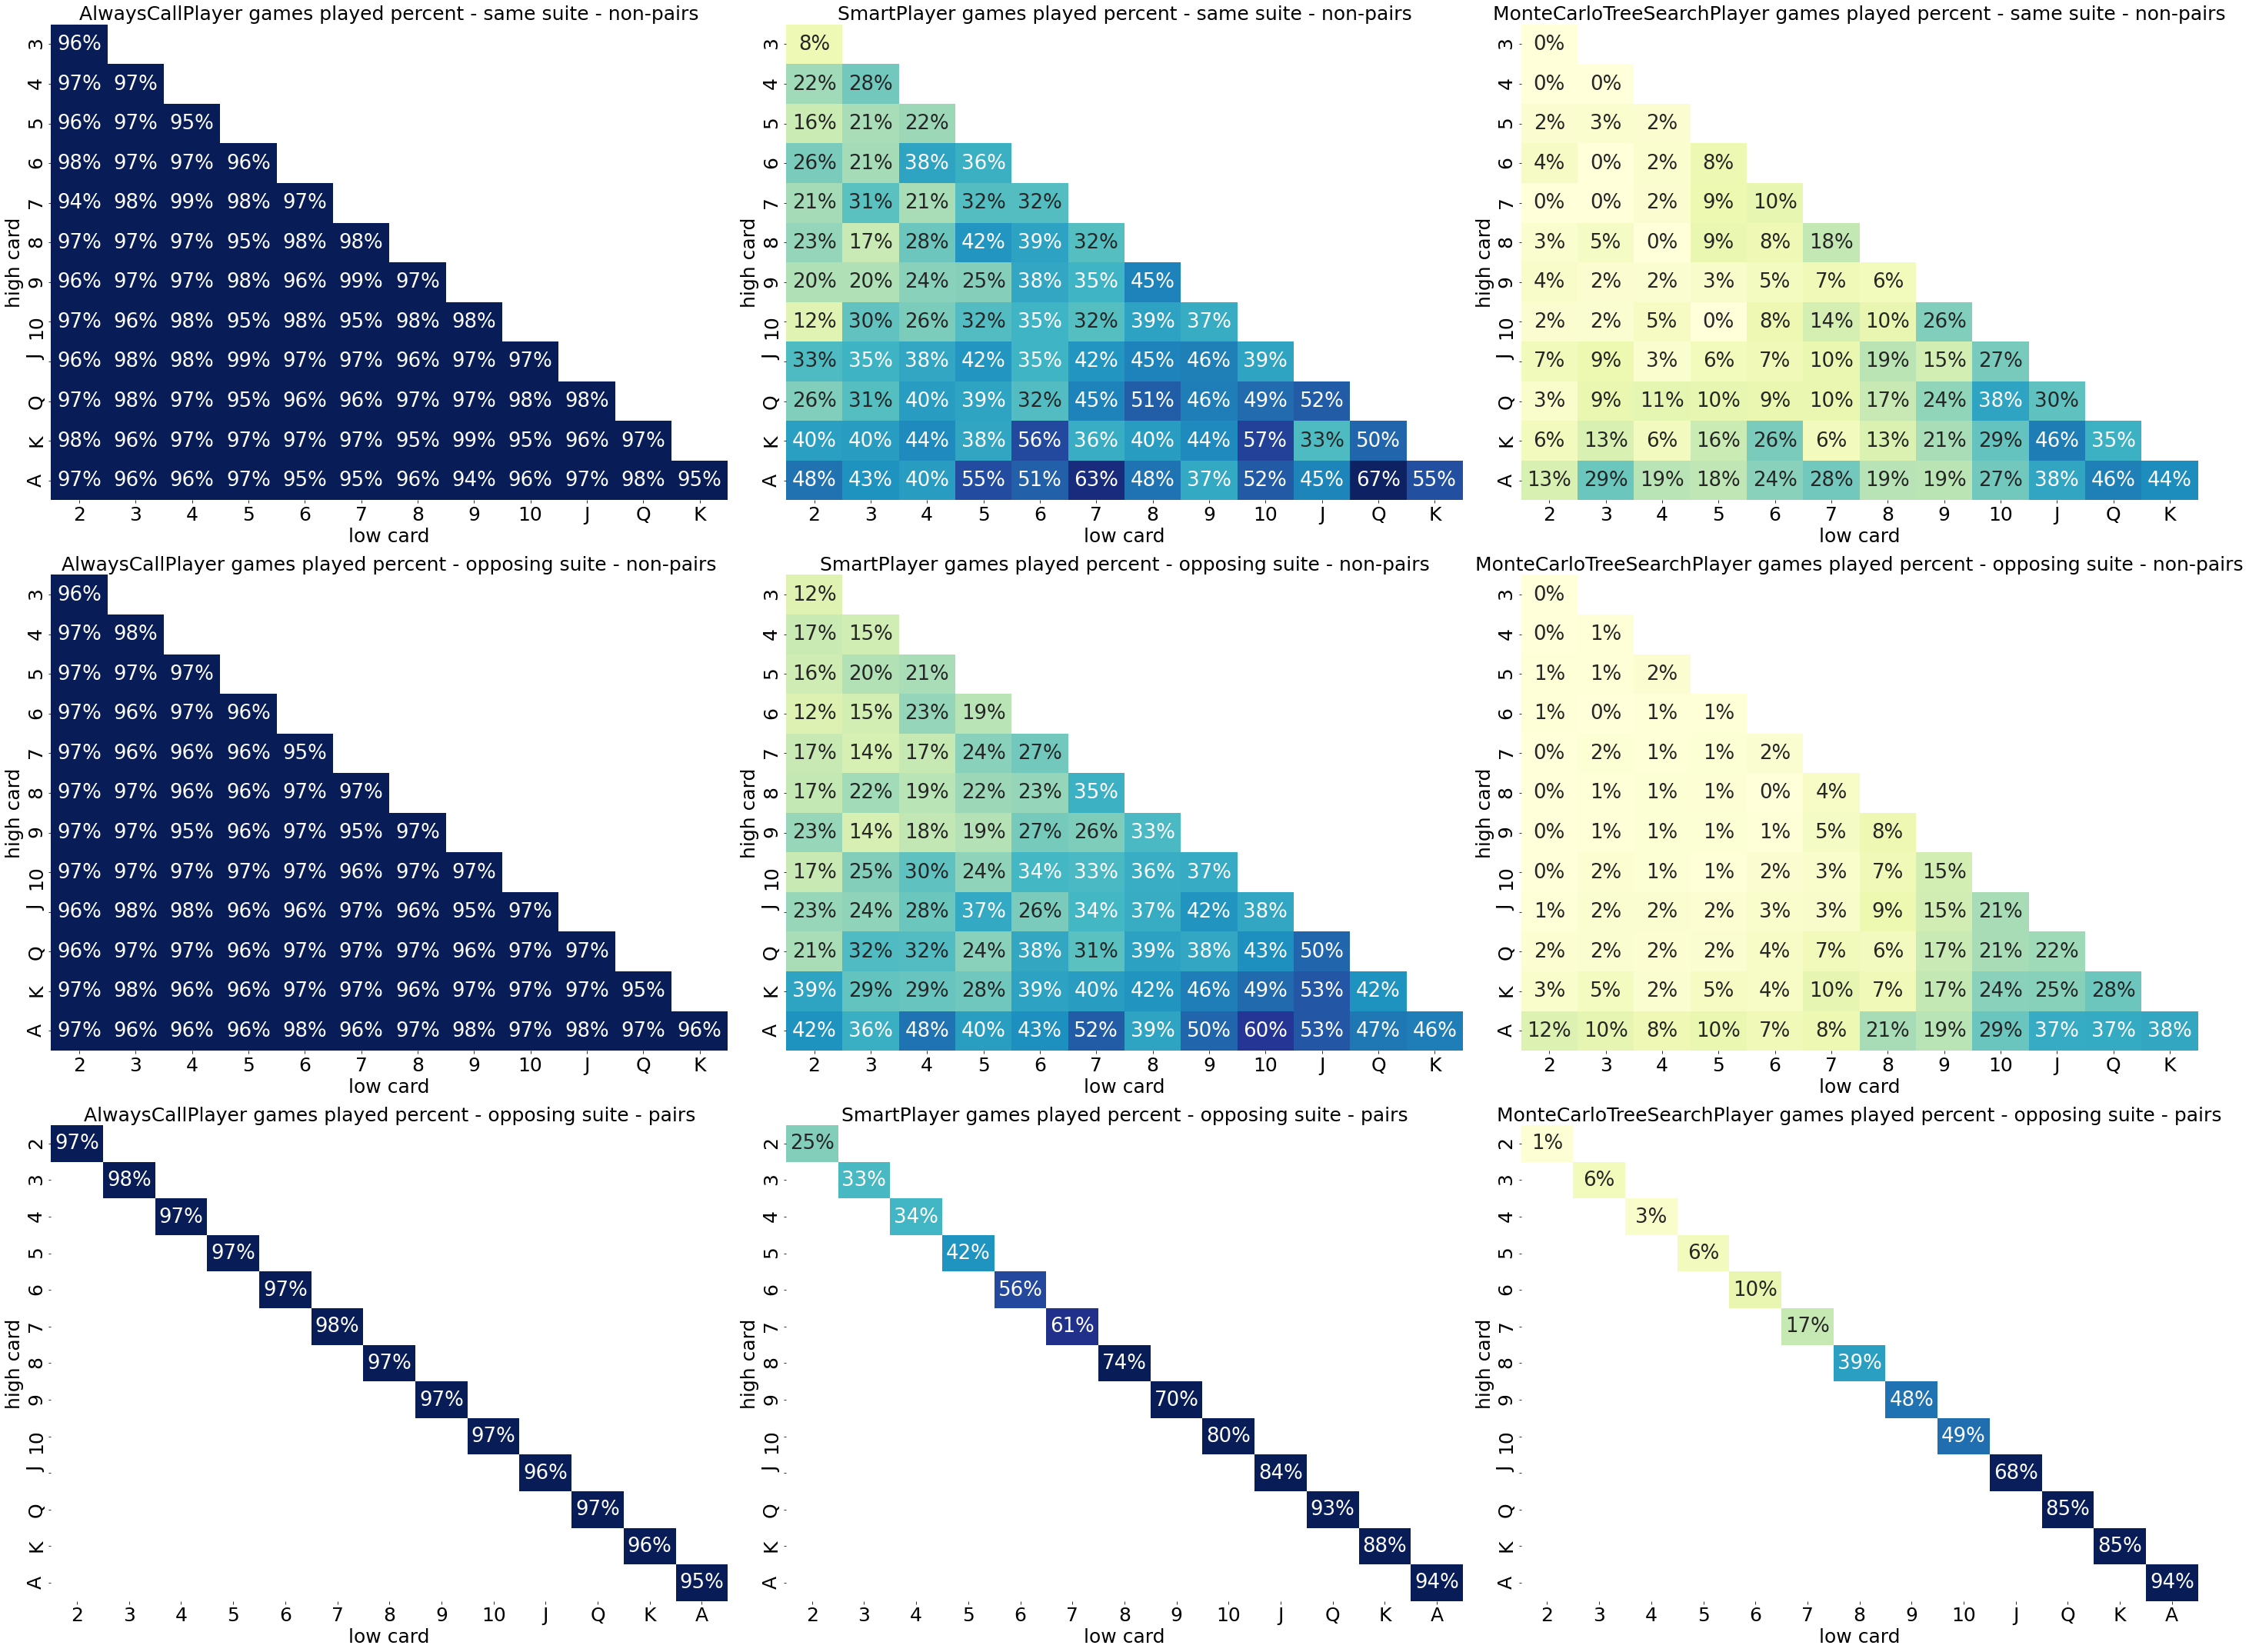

In [30]:
fig, axis = plt.subplots(3,3,figsize=(40, 30))

percentages = game_stats[['player_type','same_suit','rank1','rank2'] + [c for c in game_stats.columns if c.endswith('percent')]].sort_values(['won_game_percent','last_man_standing_percent','fold_percent','lost_game_percent'],ascending=False)
percentages['game_played_percent'] = (percentages['lost_game_percent'] + percentages['won_game_percent'])
percentages['played_win_percent'] = (np.where(percentages['game_played_percent'] > 0, percentages['won_game_percent'], 0) / percentages['game_played_percent']).fillna(0)
                                     
            
all_axis = []

for row in axis:
    for col in row:
        all_axis.append(col)

rank_order = ['2','3','4','5','6','7','8','9','10','J','Q','K','A']

suite_options = [True, False,False]
rank_options = [False,False,True]
player_type_options = ['AlwaysCallPlayer','SmartPlayer','MonteCarloTreeSearchPlayer']
options = [(suit, rank, player_type, 'game_played_percent') for suit,rank in zip(suite_options,rank_options) for player_type in player_type_options]

max_val = percentages.won_game_percent.max()
min_val = percentages.won_game_percent.min()

plot_num = 0
for suite_type,rank_type, player_type, percent in options:
    ax = all_axis[plot_num]
    if rank_type:
        query = 'same_suit == {} and player_type == "{}" and rank1 == rank2'.format(suite_type,player_type)
    else:
        query = 'same_suit == {} and player_type == "{}" and rank1 != rank2'.format(suite_type,player_type)
    filtered_percentages = percentages.query(query)
    rank1_order = [rank for rank in rank_order if rank in set(filtered_percentages['rank1'].to_list())]
    rank2_order = [rank for rank in rank_order if rank in set(filtered_percentages['rank2'].to_list())]
    percents_pivot = filtered_percentages.pivot(index='rank2',columns='rank1',values=percent)
    percents_pivot = percents_pivot.loc[rank2_order,rank1_order]
    sns.heatmap(percents_pivot, annot = True, ax = ax,cmap="YlGnBu",fmt=".0%",vmax=max_val, vmin=min_val, annot_kws={'size': 26}, cbar=False)
    title = player_type + ' games played percent - ' + ('same suite - ' if suite_type else 'opposing suite - ') + ('pairs' if rank_type else 'non-pairs') 
    ax.set_title(title,fontsize=25)
    ax.set_xlabel('low card',fontsize=25)
    ax.set_ylabel('high card',fontsize=25)
    ax.tick_params(axis='x', labelsize=25)
    ax.tick_params(axis='y', labelsize=25)
    plot_num += 1
    
plt.tight_layout()